<a href="https://www.kaggle.com/code/abukhadeejahkarl/imdb-star-wars-analysis?scriptVersionId=142280464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os



# IMDB Non-Commercial Datasets
Subsets of IMDB data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the [Non-Commercial Licensing](https://help.imdb.com/article/imdb/general-information/can-i-use-imdb-data-in-my-software/G5JTRESSHJBBHTGX?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1ed1aea6-d2ad-4705-95fd-ba13f1b5014f&pf_rd_r=XRE3QWF2G5YWTD2SGT0V&pf_rd_s=center-1&pf_rd_t=60601&pf_rd_i=interfaces&ref_=fea_mn_lk1) and [copyright/license](http://www.imdb.com/Copyright?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1ed1aea6-d2ad-4705-95fd-ba13f1b5014f&pf_rd_r=XRE3QWF2G5YWTD2SGT0V&pf_rd_s=center-1&pf_rd_t=60601&pf_rd_i=interfaces&ref_=fea_mn_lk2) and verify compliance.

# Data Location
The dataset files can be accessed and downloaded from https://datasets.imdbws.com/. The data is refreshed daily.

# IMDB Dataset Details
Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name.

In [2]:
#main media name dataset
tbasics_file = "/kaggle/input/imdb-basic-dataset/title.basics.tsv/data.tsv"
# TV show link table
eposode_file = "/kaggle/input/imdb-basic-dataset/title.episode.tsv/data.tsv"
# Big file, a linking dataset for film workers/acters to videos.  also lists jobs, category
principals_file = "/kaggle/input/imdb-basic-dataset/title.principals.tsv/data.tsv"
# ratings
ratings_file = "/kaggle/input/imdb-basic-dataset/title.ratings.tsv/data.tsv"
# Actors, Workers, people in credits
nbasics_file = "/kaggle/input/imdb-basic-dataset/name.basics.tsv/data.tsv"
# very big file; alternative names for movies. 
#  some Japanese or Chinese moves have different titles in different regions
#  ie - Shogun Assassian (US) and Lone Wolf and Cub (JP)
akas_file = "/kaggle/input/imdb-basic-dataset/title.akas.tsv/data.tsv"
# link dataset for media to directors and writers
crew_file = "/kaggle/input/imdb-basic-dataset/title.crew.tsv/data.tsv"

# Loaded the Media names and ratings dataset
- this will also download my IMDB class for dealing with these datasets
- this is still a work in progress, but it will make using multiple notebooks easier to read and use.

In [3]:
!rm -f MediaProc.py
!wget -O MediaProc.py https://raw.githubusercontent.com/salamcast/IMDBnotebook-MySQL/main/MediaProc.py

import MediaProc as mp
IM = mp.IMDB(tbasics_file, ratings_file)


--2023-09-07 22:48:14--  https://raw.githubusercontent.com/salamcast/IMDBnotebook-MySQL/main/MediaProc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4295 (4.2K) [text/plain]
Saving to: ‘MediaProc.py’

MediaProc.py        100%[===================>]   4.19K  --.-KB/s    in 0s      

2023-09-07 22:48:14 (29.7 MB/s) - ‘MediaProc.py’ saved [4295/4295]



# Make year values an integer values


In [4]:

IM.tbasics['startYear'] = IM.tbasics['startYear'].astype('int64', errors='ignore') #
IM.tbasics['endYear'] = IM.tbasics['endYear'].astype('int64', errors='ignore') #.convert_dtypes(convert_string=False)
IM.tbasics['runtimeMinutes'] = IM.tbasics['runtimeMinutes'].astype('int64', errors='ignore') #.convert_dtypes(convert_string=False)
IM.tbasics['numVotes'] = IM.tbasics['numVotes'].astype('int64', errors='ignore')
IM.tbasics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short",5.7,1990.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short",5.8,265.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1868.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short",5.5,177.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short",6.2,2655.0
...,...,...,...,...,...,...,...,...,...,...,...
10127899,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,NaN,NaN,"Action,Drama,Family",NaN,NaN
10127900,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,NaN,NaN,"Action,Drama,Family",NaN,NaN
10127901,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,NaN,NaN,"Action,Drama,Family",NaN,NaN
10127902,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short,NaN,NaN


# Build TV show DataFrame

In [5]:
IM.set_tvshows(eposode_file)

# Build the Videos DataFrame without TV Shows

In [6]:
IM.filter_tv()
#IM.Videos

# Lets look at the ratings of Star Wars
I was 5-6 when I first saw a New Hope and Empire Strikes Back.  I also read a lot of the legacy books when I was in grade 8.  lots of memories. I'm only selecting the main live action Movies, the Clone Wars anamated movie has less than 100000 votes, so I filtered it out based on that.

In [7]:
SW = IM.Videos.loc[ IM.Videos["primaryTitle"].str.contains("Star Wars") & (IM.Videos['titleType'] == 'movie') & (IM.Videos['numVotes'] > 100000) ].dropna().drop(columns=['titleType', 'originalTitle', 'isAdult']).sort_values(by='year')
SW['minutes'] = SW['minutes'].astype('int64', errors='ignore')
SW['year'] = SW['year'].astype('int64', errors='ignore')
SW

,tconst,primaryTitle,year,minutes,genres,averageRating,numVotes
75145,tt0076759,Star Wars: Episode IV - A New Hope,1977,121,"Action,Adventure,Fantasy",8.6,1410776.0
78959,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,124,"Action,Adventure,Fantasy",8.7,1338964.0
84303,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,131,"Action,Adventure,Fantasy",8.3,1091144.0
117963,tt0120915,Star Wars: Episode I - The Phantom Menace,1999,136,"Action,Adventure,Fantasy",6.5,833953.0
118685,tt0121765,Star Wars: Episode II - Attack of the Clones,2002,142,"Action,Adventure,Fantasy",6.6,738103.0
118686,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,140,"Action,Adventure,Fantasy",7.6,821772.0
6132952,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,138,"Action,Adventure,Sci-Fi",7.8,955275.0
7346783,tt3748528,Rogue One: A Star Wars Story,2016,133,"Action,Adventure,Sci-Fi",7.8,665739.0
6164045,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152,"Action,Adventure,Fantasy",6.9,655047.0
7359838,tt3778644,Solo: A Star Wars Story,2018,135,"Action,Adventure,Sci-Fi",6.9,366532.0


In [8]:
def MovieAvgRating(DF, fig=(15,10)):
    return DF.plot.line(
        x='primaryTitle',
        y=[ 'averageRating', 'numVotes' ],
        secondary_y='numVotes', 
#        stacked=True , 
        rot=90, 
        figsize=fig, 
        xticks=range(0, DF['primaryTitle'].count()),
        
    )


def MovieRuntime(DF, fig=(15,10)):
    return DF.plot.line(
        x='primaryTitle', 
        y=[ 'minutes', 'averageRating' ], 
        secondary_y='averageRating', 
        rot=90, 
        figsize=fig, 
        xticks=range(0, DF['primaryTitle'].count())
    )

def MovieHexBin(DF, fig=(15,10),title="Movies hexbin"):
    DF.plot.hexbin(
        C='minutes',
        y='averageRating',
        x='numVotes',
        # reduce_C_function=np.sum,
        gridsize=10,
        cmap="viridis", 
        title=title,
        figsize=fig
    )

# lets look at the Average Rating and Number of Votes of the movies

My favorate Star Wars movie is Revenge of the Sith, it's IMDB rating is 7.6.  

My least favorate star wars movies are Last Jedi and The Rise of Skywalker, their IMDB ratings are 6.9 and 6.5.

Empire Strikes Back has the highest average rating, then A New Hope and Return of the Jedi -- these are Classics!


<Axes: xlabel='primaryTitle'>

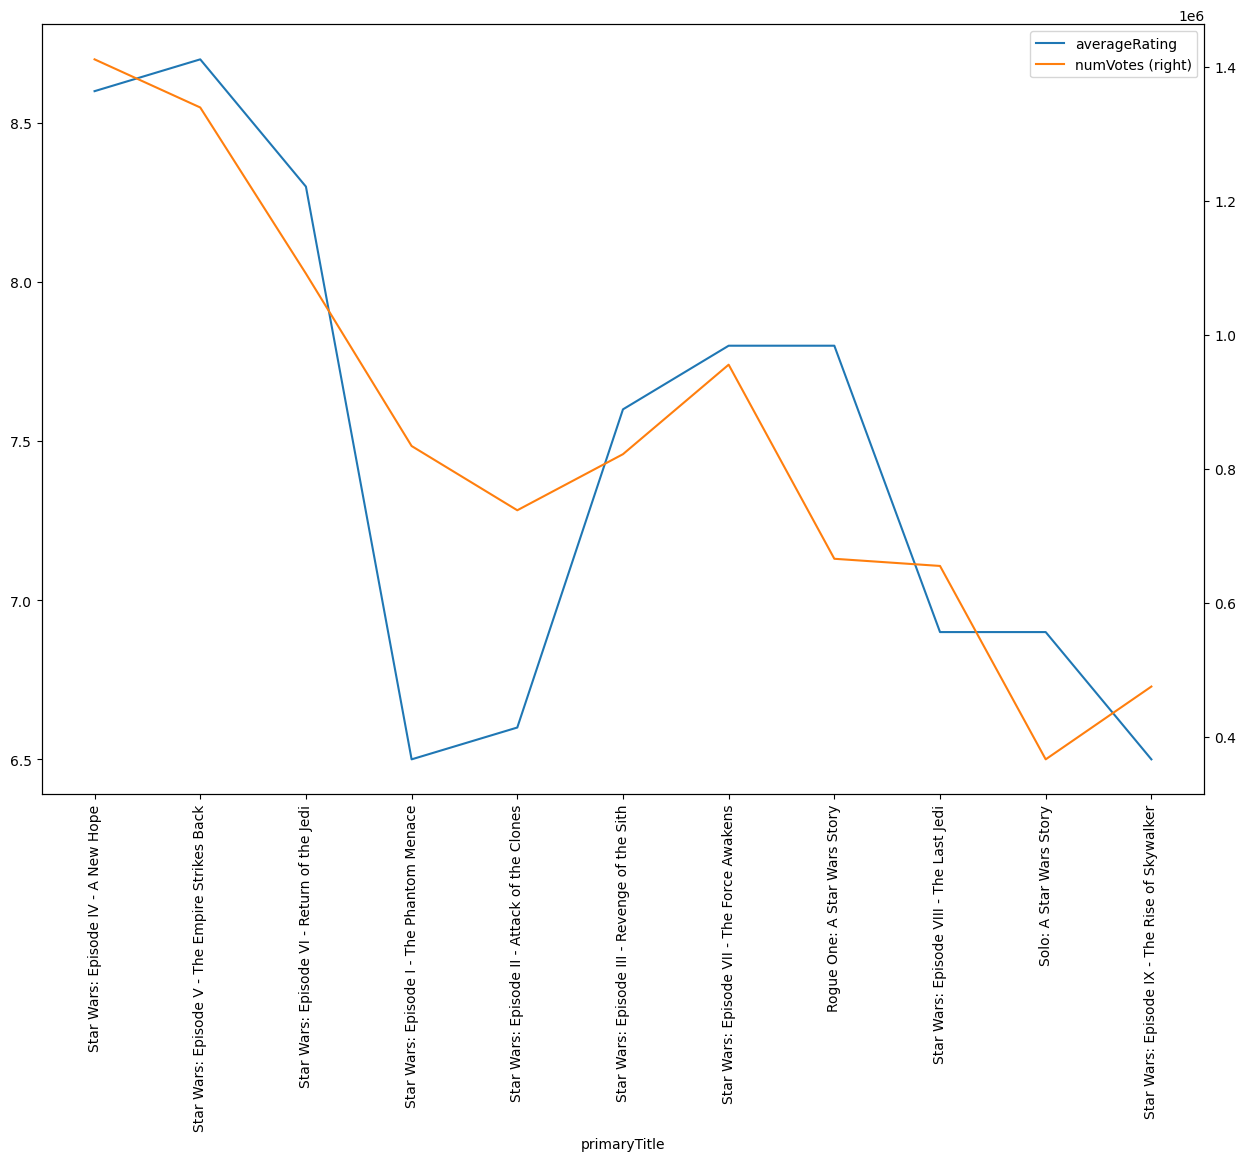

In [9]:
#SW.plot.bar(x='primaryTitle', 
#            y='averageRating', 
#            xlabel="Star Wars Movie Ratings",
#            ylim = (SW.averageRating.min()-0.5, SW.averageRating.max()+0.5)
#           )

MovieAvgRating(SW)

<Axes: xlabel='primaryTitle'>

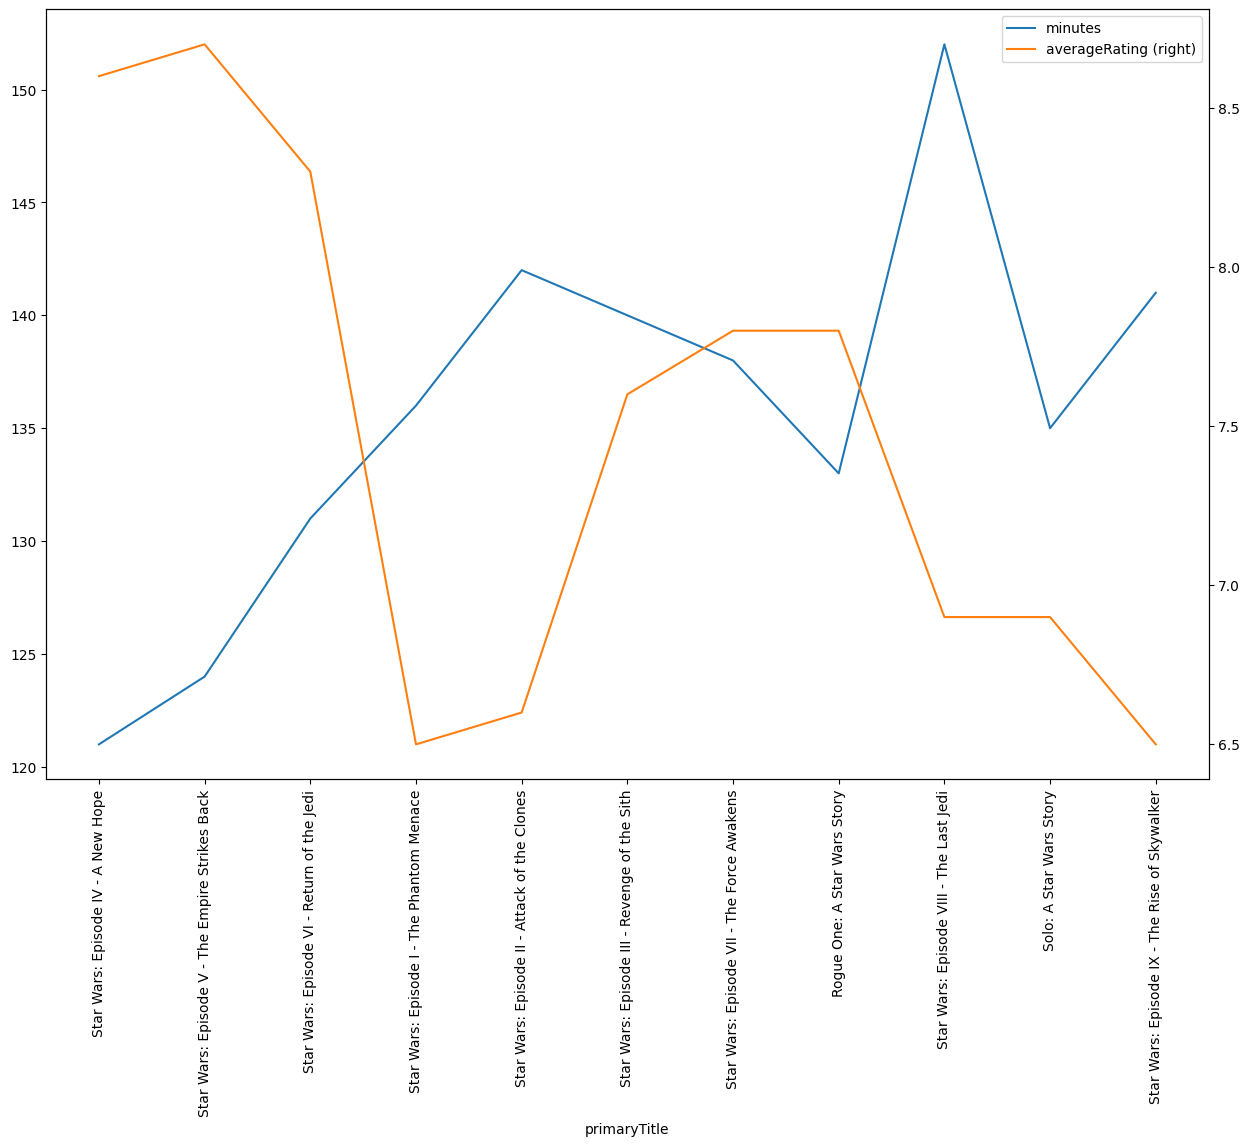

In [10]:
#SW.plot.bar(x='primaryTitle', 
#            y='numVotes', 
#            xlabel="Votes for Star Wars Movies",
#            logy = True,
#            ylim = (SW.numVotes.min()-0.5, SW.numVotes.max()+5)
#           )
MovieRuntime(SW)

# Scater Plot of Average Rating to number of votes over the years

<Axes: title={'center': 'How did the average rating of Star Wars change over the years?\n\n'}, xlabel='primaryTitle', ylabel='averageRating'>

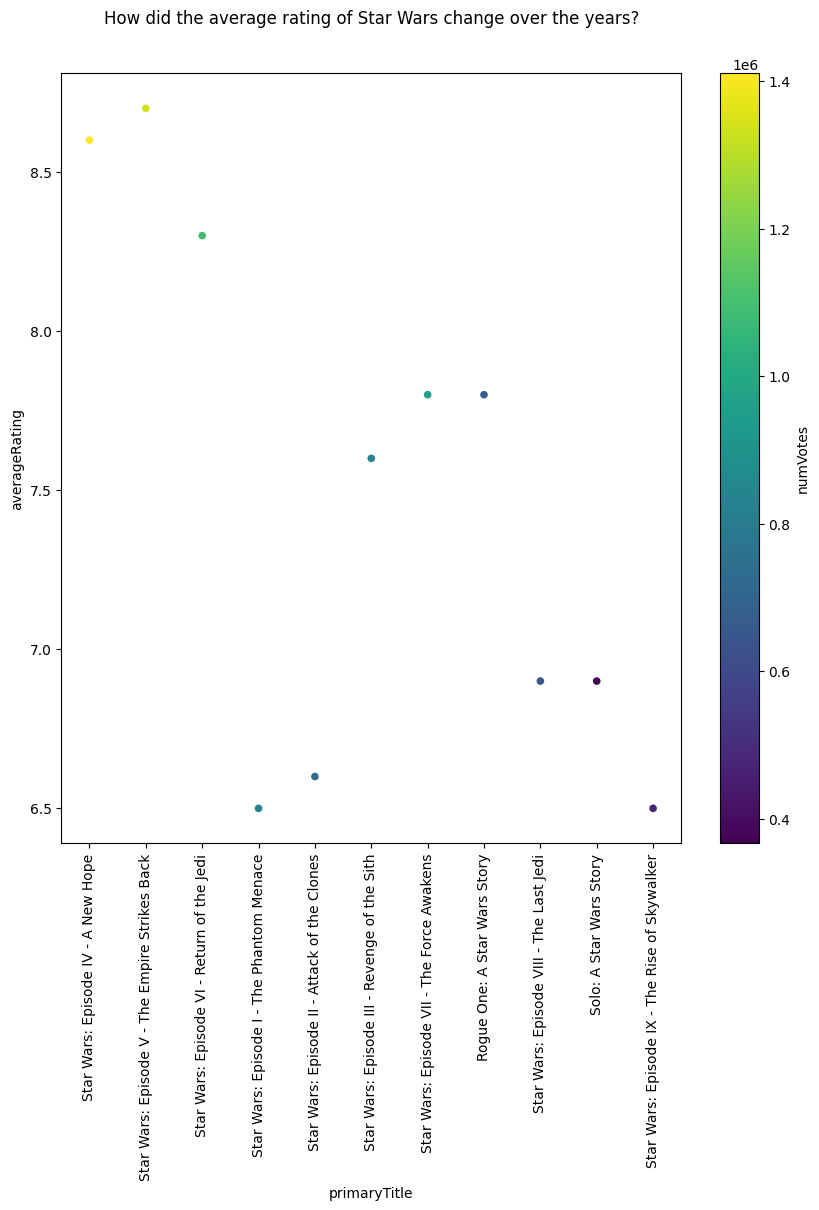

In [11]:
SW.plot.scatter(
    title="How did the average rating of Star Wars change over the years?\n\n",
    x='primaryTitle',
    c='numVotes',
    y='averageRating',
    colormap='viridis',
    rot=90,
    #logy=True, 
    figsize=(10, 10)
)

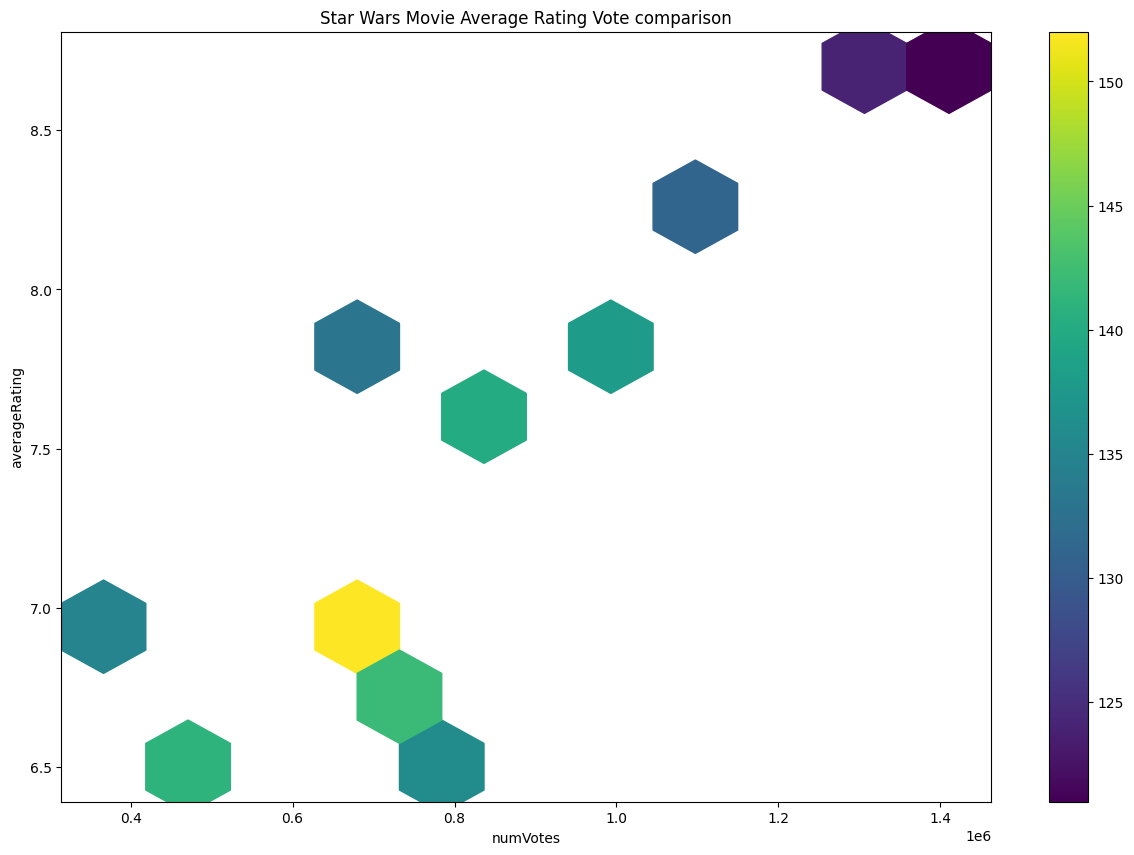

In [12]:
MovieHexBin(SW,title="Star Wars Movie Average Rating Vote comparison")

# What is the trend of Star Wars TV Shows?
im going to plot all the TV shows that have Star Wars in the TV show title.  this will look at the ratings by year and color the values based on votes for each entry. The newer series has a lot more votes than some of the older ones and they vary. The clone wars cartoon had a fews gap between the end of season 6 and 7, so it had lost some of the early viewer ship. Disney+ has made it easier to rewatch the old Star Wars movies and TV shows, but they have made some desions that have angered many subscribers enough to cancel their subscriptions.  

In [13]:
SWTV = IM.TVShow.loc[ (IM.TVShow.numVotes > 100 ) & IM.TVShow["TVShow"].str.contains("Star Wars|The Book of Boba Fett|Mandalorian|Ahsoka|Andor|Obi-Wan Kenobi", regex=True) ].drop(columns=['titleType', 'originalTitle', 'isAdult', "year","originalEpisode", "genres", "endYear"]).sort_values(by='startYear').dropna()
SWTV['startYear'] = SWTV['startYear'].astype('int64', errors='ignore')
SWTV['minutes'] = SWTV['minutes'].astype('int64', errors='ignore')
SWTV['episodeTitle'] = SWTV['S'].astype('str') + 'x' + SWTV['E'].astype('str') + ' ' + SWTV['episodeTitle']
SWTV['S'] = SWTV['S'].astype('int64', errors='ignore')
SWTV['E'] = SWTV['E'].astype('int64', errors='ignore')
SWTV

,tconst,S,E,TVShow,startYear,episodeTitle,minutes,averageRating,numVotes
304358,tt0814126,2,1,Star Wars: Droids,1985,2x1 The Great Heep,48,6.0,273.0
318603,tt0837309,1,1,Star Wars: Droids,1985,1x1 The White Witch,23,5.8,183.0
318601,tt0837307,1,11,Star Wars: Droids,1985,1x11 The Roon Games,23,6.1,121.0
318600,tt0837306,1,8,Star Wars: Droids,1985,1x8 The Revenge of Kybo Ren,23,5.8,132.0
318599,tt0837305,1,7,Star Wars: Droids,1985,1x7 The Pirates of Tarnoonga,23,5.8,130.0
...,...,...,...,...,...,...,...,...,...
2075791,tt13636426,1,1,Obi-Wan Kenobi,2022,1x1 Part I,53,7.4,25184.0
2168846,tt13847652,1,7,Andor,2022,1x7 Announcement,50,8.0,10964.0
2166026,tt13841824,1,6,Obi-Wan Kenobi,2022,1x6 Part VI,48,8.4,23019.0
2069852,tt13622790,1,1,Ahsoka,2023,1x1 Part One: Master and Apprentice,55,8.0,8784.0


# functions for ploting the TV Series data

- Average Rating line plot
- Number of Votes line plot
- Run Time line plot
- HexBin

In [14]:
def TVShowAvgRating(DF, fig=(15,10), x='episodeTitle'):
    return DF.plot.line(
        x=x,
        y=[ 'averageRating', 'numVotes' ],
        secondary_y='numVotes', 
#        stacked=True , 
        rot=90, 
        figsize=fig, 
        xticks=range(0, DF['E'].count()),
        fontsize=10.0,
        xlabel=x,
#        ylabel=[ 'averageRating', 'numVotes' ]
        
    )


def TVShowRuntime(DF, fig=(15,10), x='episodeTitle'):
    return DF.plot.line(
        x=x, 
        y=[ 'minutes', 'averageRating' ], 
        secondary_y='averageRating', 
        rot=90, 
        figsize=fig, 
        xticks=range(0, DF['E'].count()),
        fontsize=10.0,
        xlabel=x,
#        ylabel='minutes'
    )

def TVShowHexBin(DF, fig=(15,10), title="TVShow hexbin", c='minutes', y='averageRating', x='numVotes'):
    DF.plot.hexbin(
        C=c,
        y=y,
        x=x,
        reduce_C_function=np.sum,
        gridsize=10,
        cmap="viridis", 
        title=title,
        figsize=fig,
        xlabel=x,
        ylabel=y,
        
    )

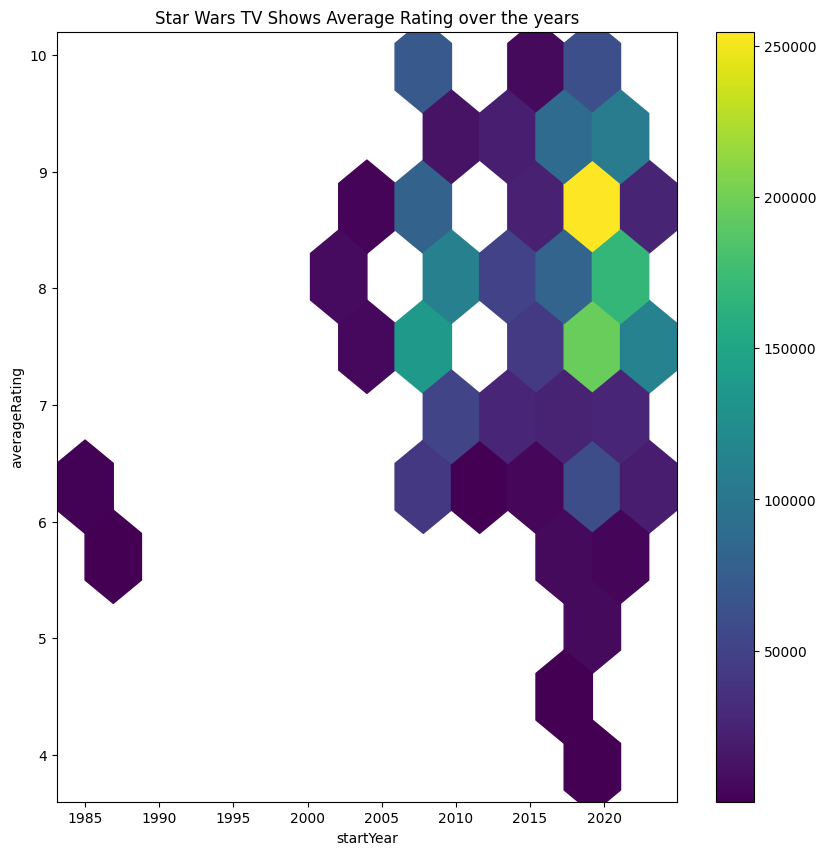

In [15]:

TVShowHexBin(SWTV,x='startYear', y='averageRating',c='numVotes', title="Star Wars TV Shows Average Rating over the years",
                 fig=(10, 10)
               )

# Lets look at the Star Wars TV Show data grouped by each Show
Each show has an average rating of all episode in each TV Show.
Sum of all the votes for each TV Show

In [16]:
ep = SWTV.groupby('TVShow').E.count()

mins = SWTV.groupby('TVShow').minutes.sum()
rate = SWTV.groupby('TVShow').averageRating.sum()
votes = SWTV.groupby('TVShow').numVotes.sum()

enum = pd.DataFrame(ep)
enum['minutes'] = mins
enum['averageRating'] = rate / enum['E']
enum['numVotes'] = votes
enum = enum.sort_values(by="averageRating").reset_index()

In [17]:
enum

,TVShow,E,minutes,averageRating,numVotes
0,Star Wars Galaxy of Adventures,4,4,4.425000,406.0
1,Star Wars: Droids,14,347,6.021429,2022.0
2,Star Wars: Forces of Destiny,36,168,6.175000,7804.0
3,Star Wars Vehicle Flythroughs,2,7,6.350000,228.0
4,Star Wars Resistance,50,897,6.350000,18173.0
5,Lego Star Wars: The Yoda Chronicles,10,160,6.900000,2236.0
6,Star Wars: Visions,10,163,6.970000,44920.0
7,Lego Star Wars: The Freemaker Adventures,4,92,7.325000,474.0
8,Lego Star Wars: Droid Tales,4,96,7.475000,452.0
9,Obi-Wan Kenobi,6,261,7.500000,138059.0


<Axes: xlabel='TVShow'>

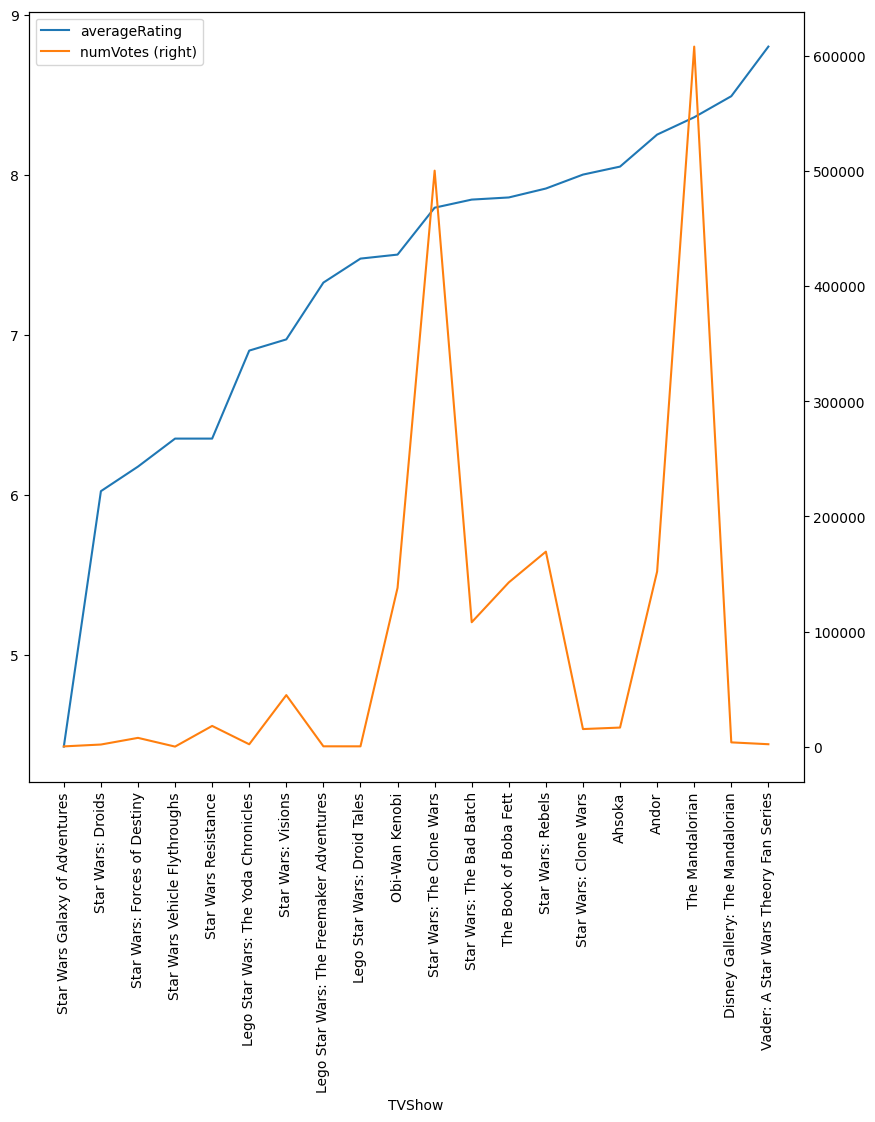

In [18]:
TVShowAvgRating(enum, (10,10), "TVShow")

<Axes: xlabel='TVShow'>

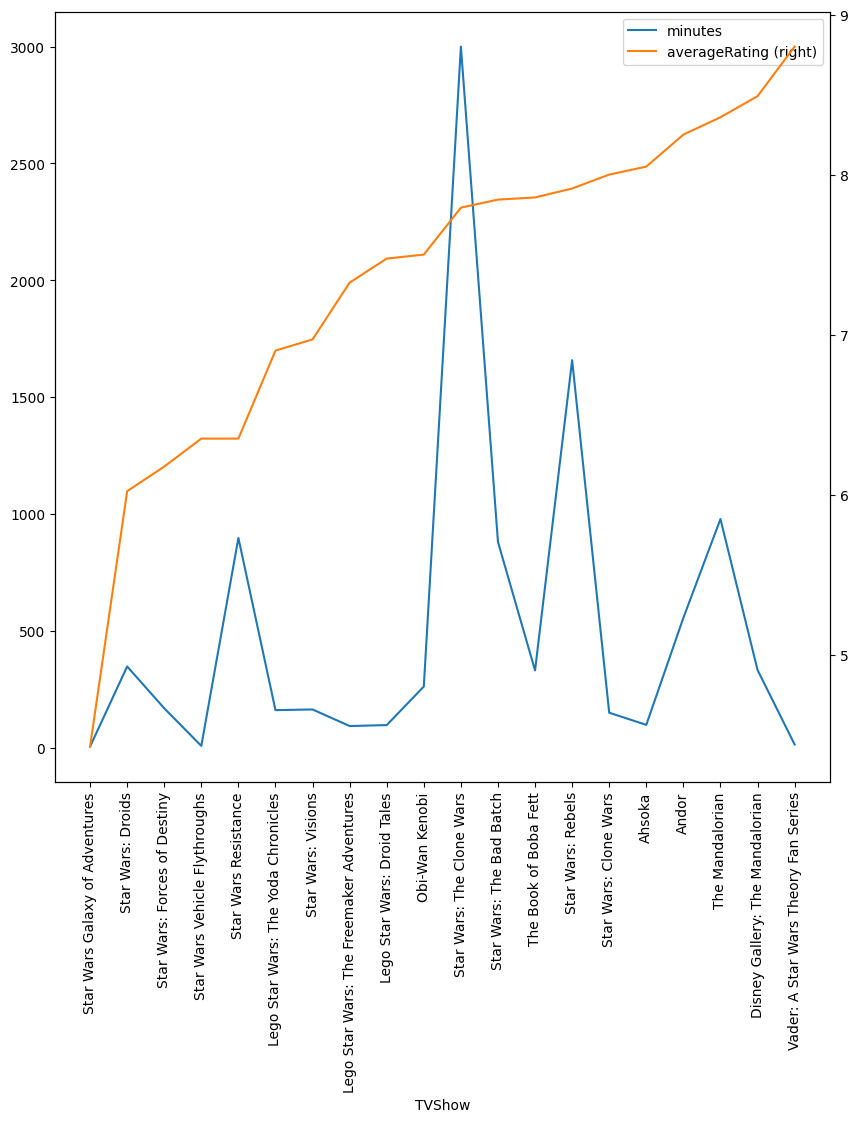

In [19]:
TVShowRuntime(enum, (10,10), "TVShow")

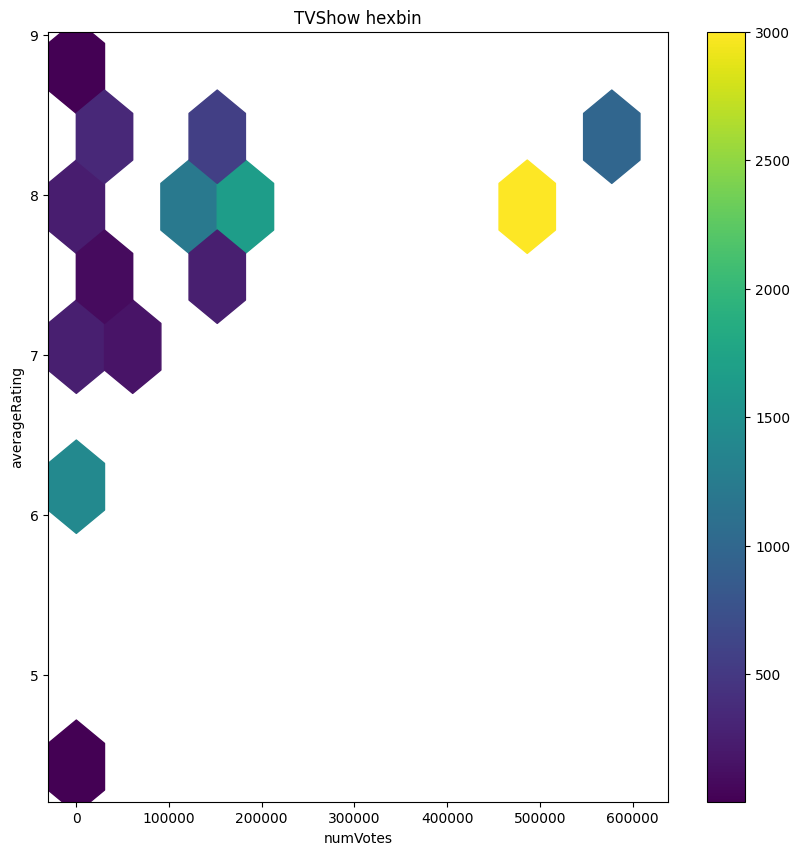

In [20]:
TVShowHexBin(enum, (10,10))

# Lets look at each the more recient Star Wars TV shows
I will look ate the more recient star wars tv shows and plot the data so you can see how they compaire over time based on Average Rating, Number of Votes and Run Time over their run.  The shows we will be looking at are:

- Star Wars: The Clone Wars
- Andor
- Star Wars: The Bad Batch
- Ahsoka
- The Mandalorian
- Obi-Wan Kenobi

The Clone Wars has the most episodes and ran over several years, it was also an animated series.  Many of the Star Wars TV Series before The Mandalorian have been Animated and aimed at a younger audience, like Rebels and The Bad Batch.

Something I have noticed with the new TV Series on Disney+ is that the run time is inconsistant with shows that were on TV in the past -- Star Trek DS9 would have episodes that ran around 45 minutes each

In [21]:
shows = {}
shows['theCloneWars'] = SWTV.loc[(SWTV.TVShow == 'Star Wars: The Clone Wars')].sort_values(by=['S', 'E'])
shows['Andor'] = SWTV.loc[(SWTV.TVShow == 'Andor')].sort_values(by=['S', 'E'])
shows['BadBatch'] = SWTV.loc[(SWTV.TVShow == 'Star Wars: The Bad Batch')].sort_values(by=['S', 'E'])
shows['Ahsoka'] = SWTV.loc[(SWTV.TVShow == 'Ahsoka')].sort_values(by=['S', 'E'])
shows['Mando'] = SWTV.loc[(SWTV.TVShow == 'The Mandalorian')].sort_values(by=['S', 'E'])
shows['Obiwan'] = SWTV.loc[(SWTV.TVShow == 'Obi-Wan Kenobi')].sort_values(by=['S', 'E'])

# here is a quick view of The Clone Wars DataFrame
All the other DataFrames will have the same columns, so I will just plot them bellow.

In [22]:
shows['theCloneWars']

,tconst,S,E,TVShow,startYear,episodeTitle,minutes,averageRating,numVotes
1745948,tt1288767,1,1,Star Wars: The Clone Wars,2008,1x1 Ambush,21,7.3,5334.0
1745951,tt1288768,1,2,Star Wars: The Clone Wars,2008,1x2 Rising Malevolence,22,7.3,4719.0
1764474,tt1292836,1,3,Star Wars: The Clone Wars,2008,1x3 Shadow of Malevolence,22,7.3,4418.0
1764456,tt1292833,1,4,Star Wars: The Clone Wars,2008,1x4 Destroy Malevolence,22,7.4,4289.0
1764468,tt1292835,1,5,Star Wars: The Clone Wars,2008,1x5 Rookies,22,7.9,4641.0
...,...,...,...,...,...,...,...,...,...
7475725,tt9313960,7,8,Star Wars: The Clone Wars,2008,7x8 Together Again,23,7.0,4108.0
7475726,tt9313962,7,9,Star Wars: The Clone Wars,2008,7x9 Old Friends Not Forgotten,27,9.7,11761.0
7475727,tt9313966,7,10,Star Wars: The Clone Wars,2008,7x10 The Phantom Apprentice,27,9.9,15693.0
7475728,tt9313968,7,11,Star Wars: The Clone Wars,2008,7x11 Shattered,26,9.8,14153.0


# The Clone Wars
This a good anamated series, the average ratings jump around someware between 6 to 10, the 

<Axes: xlabel='episodeTitle'>

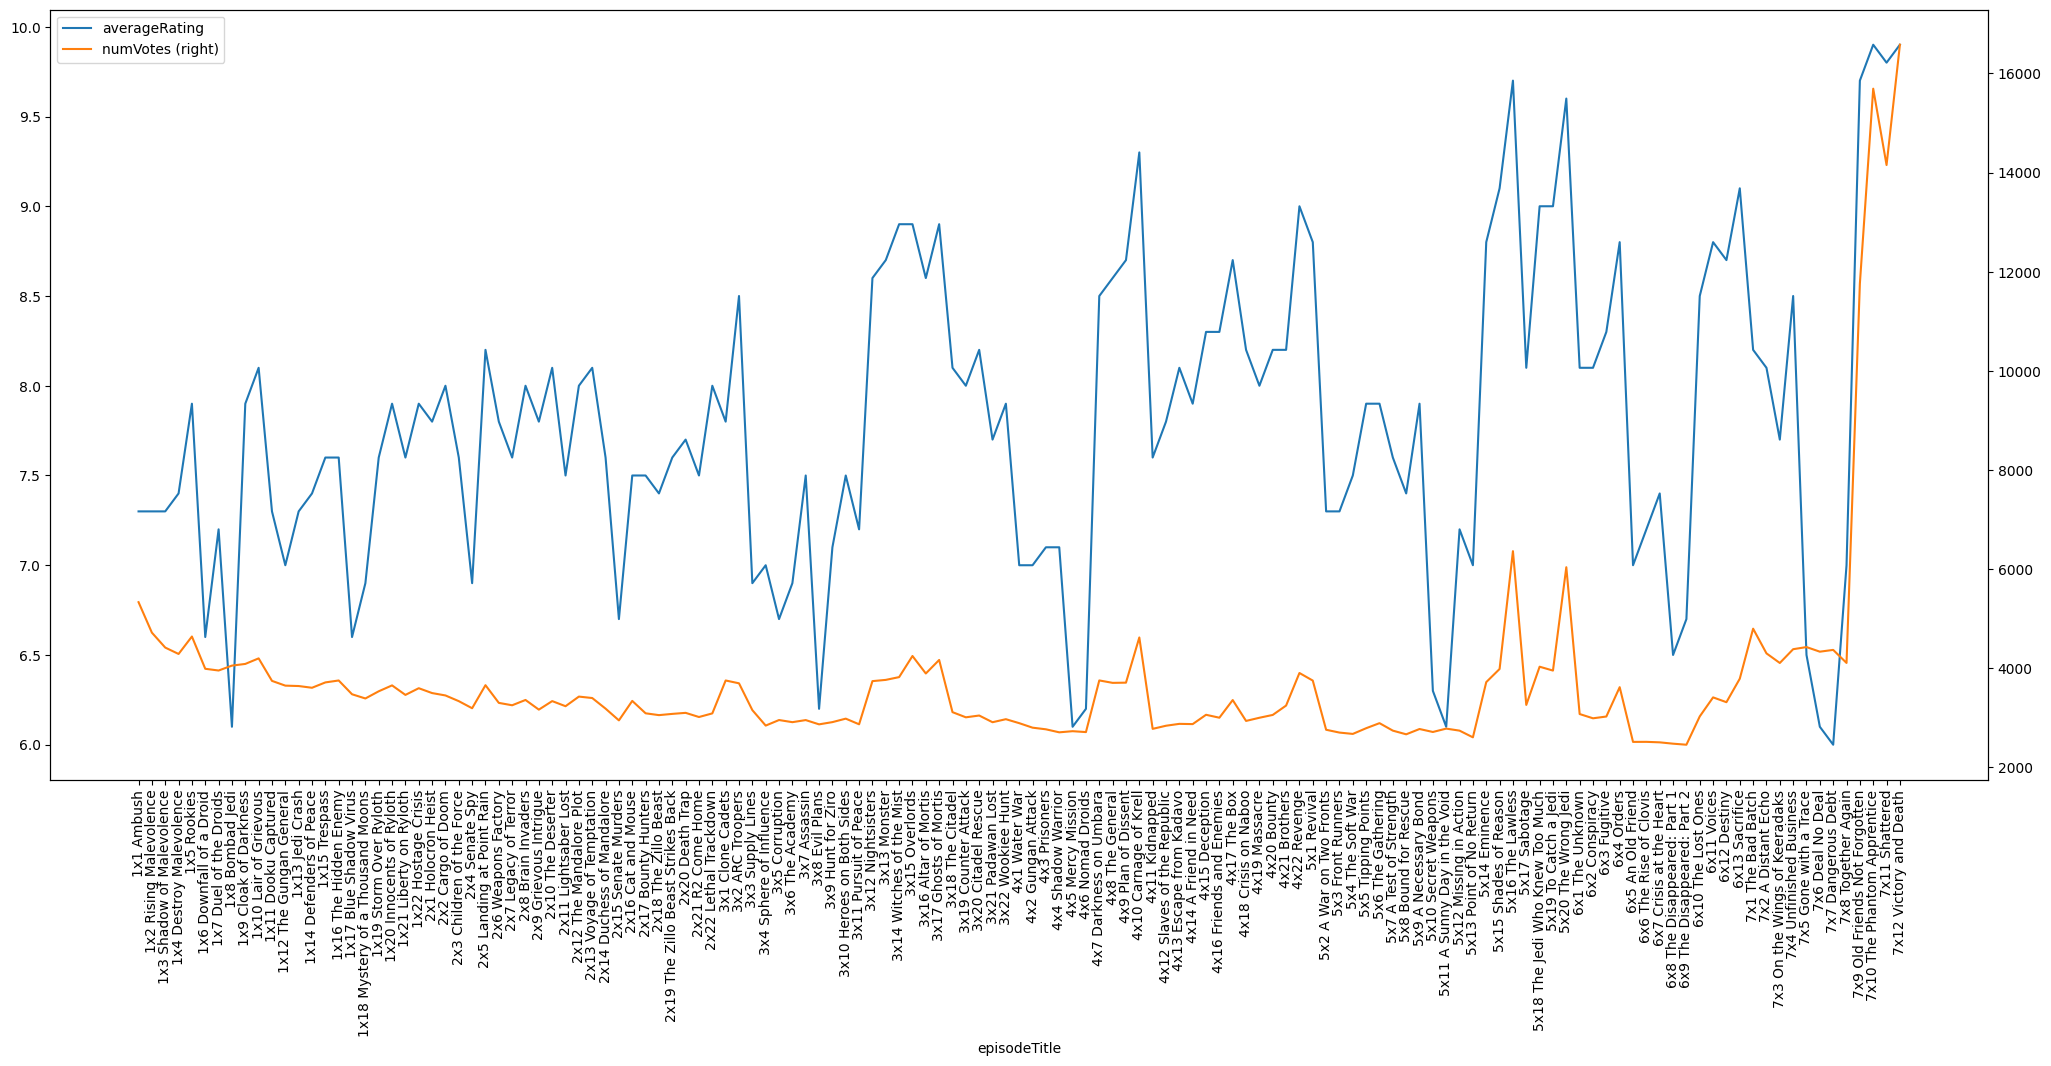

In [23]:
TVShowAvgRating(shows['theCloneWars'], (25,10))

<Axes: xlabel='episodeTitle'>

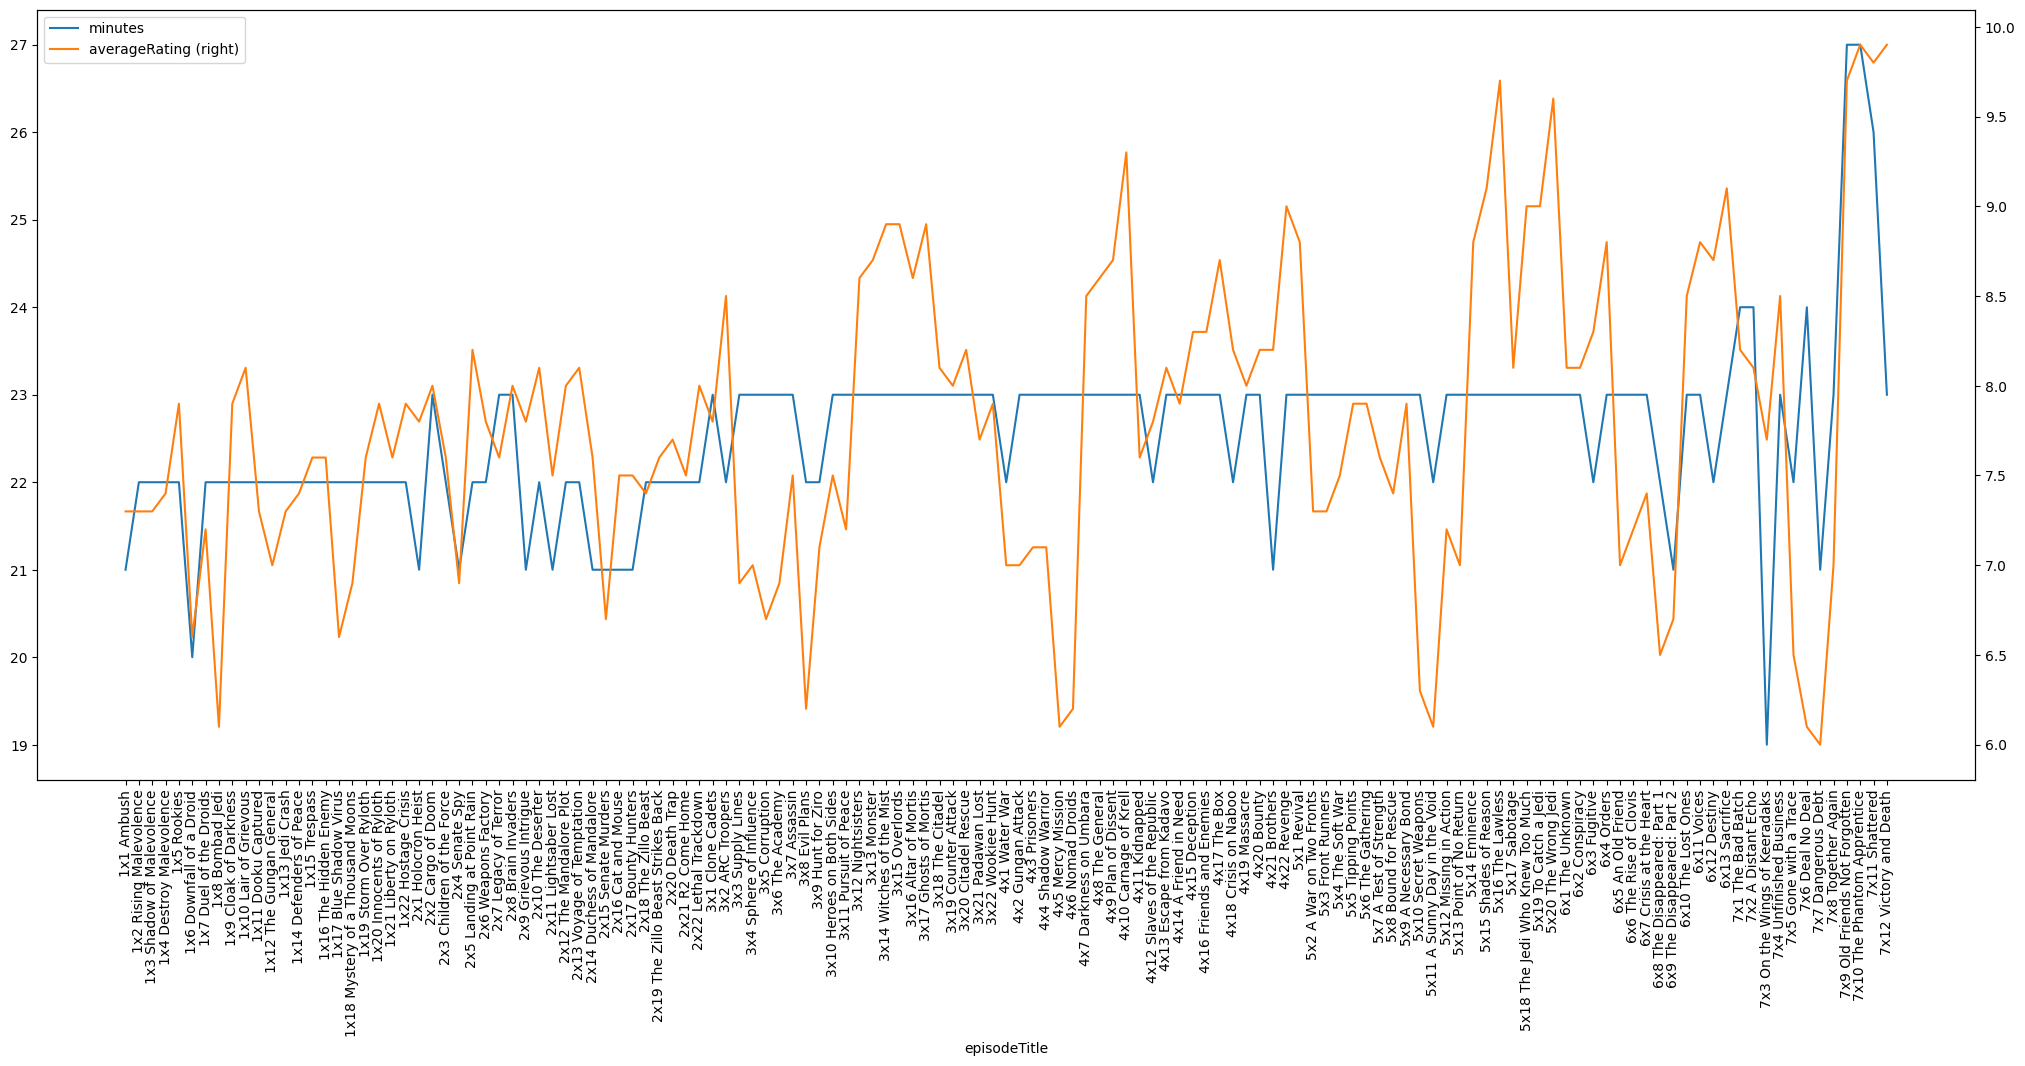

In [24]:
TVShowRuntime(shows['theCloneWars'], (25,10))

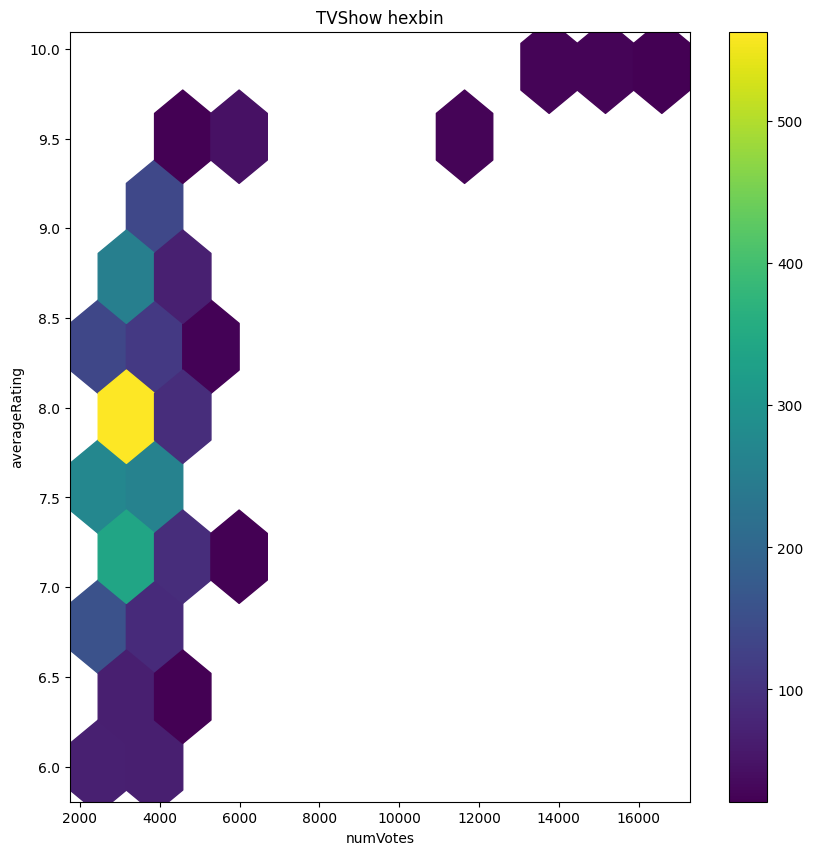

In [25]:
TVShowHexBin(shows['theCloneWars'], (10,10))

<Axes: xlabel='episodeTitle'>

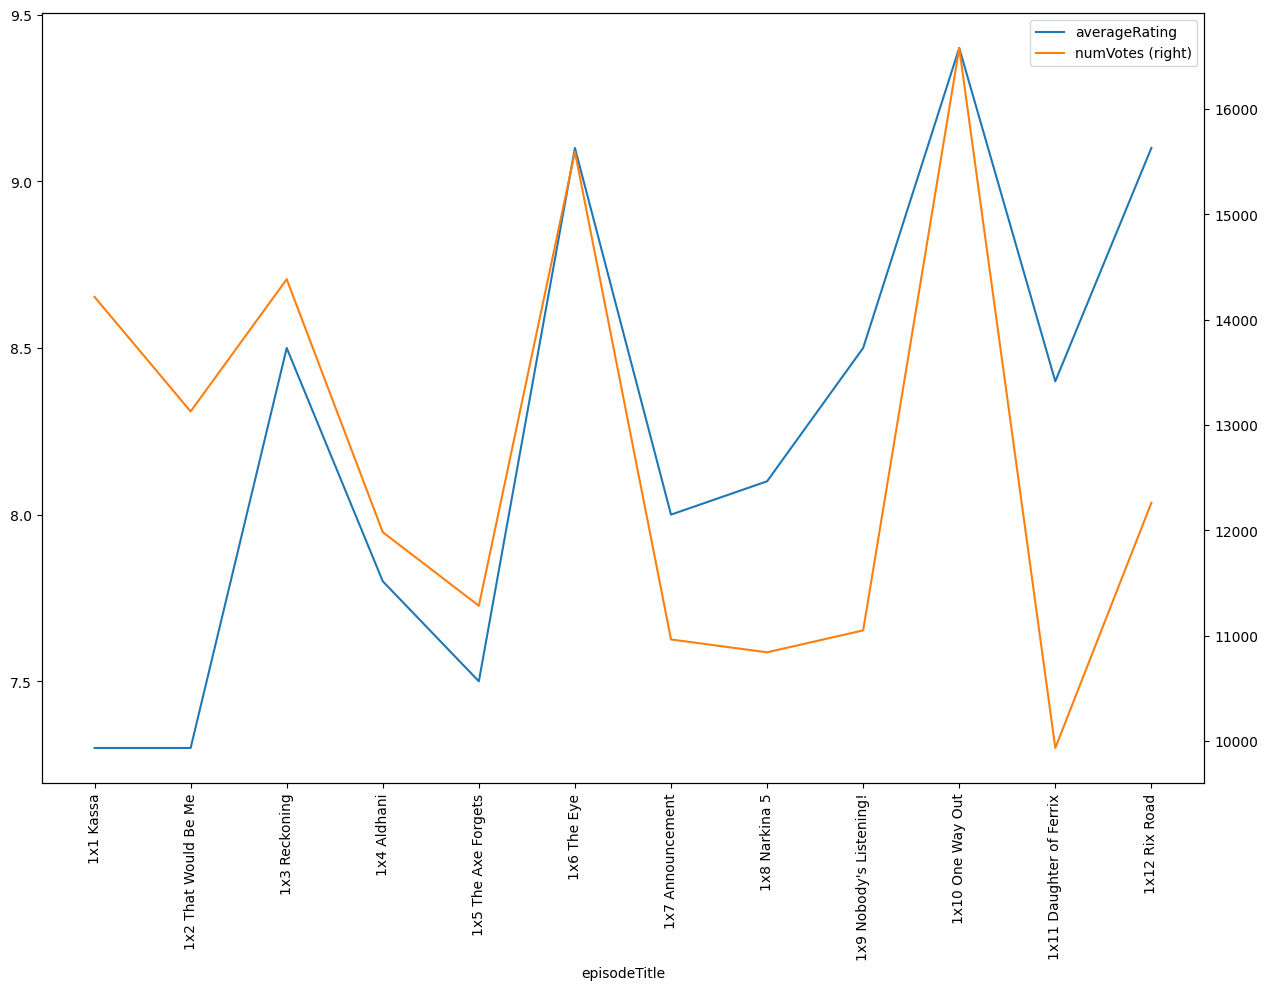

In [26]:
TVShowAvgRating(shows['Andor'])


<Axes: xlabel='episodeTitle'>

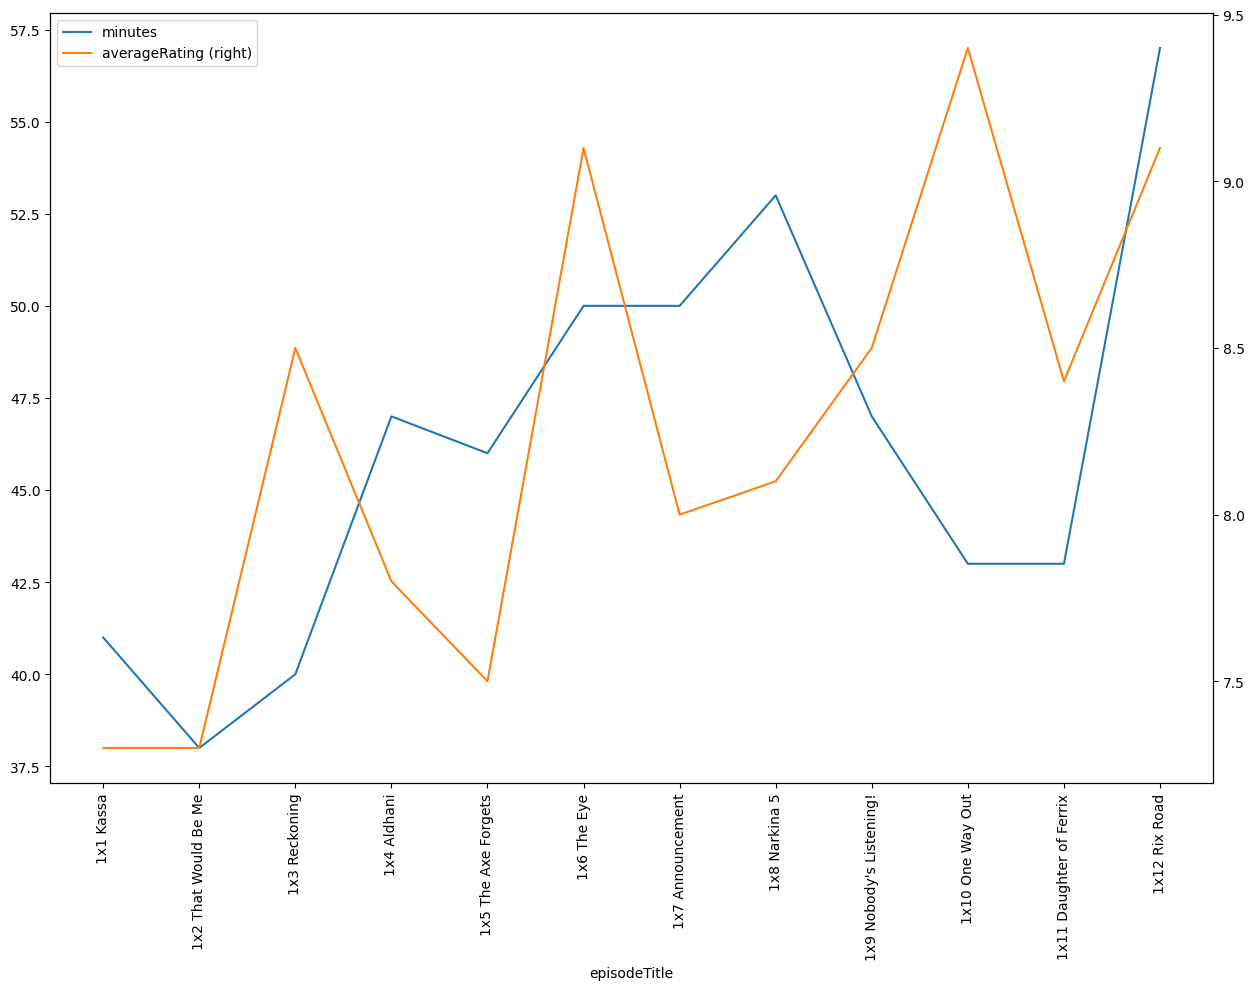

In [27]:
TVShowRuntime(shows['Andor'])

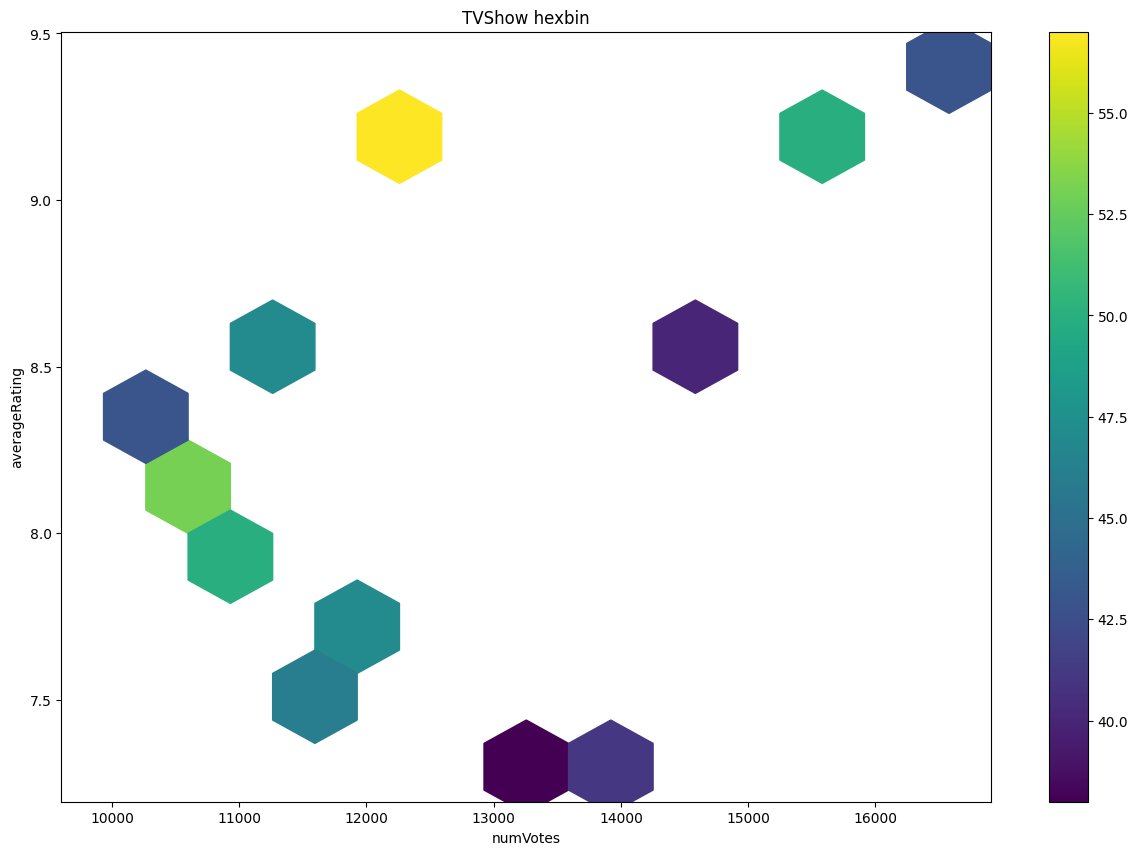

In [28]:
TVShowHexBin(shows['Andor'])

<Axes: xlabel='episodeTitle'>

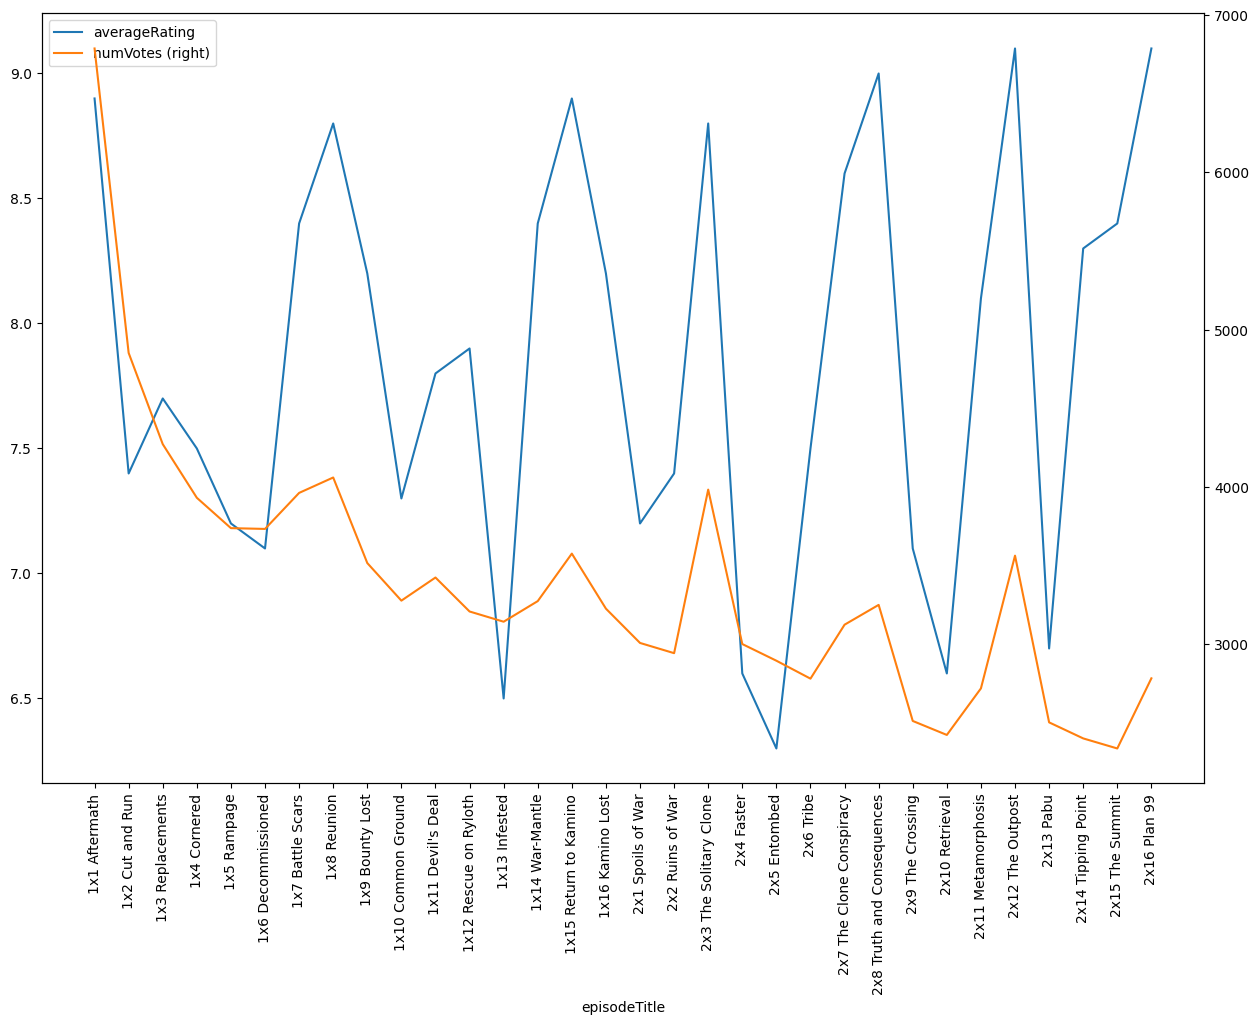

In [29]:
TVShowAvgRating(shows['BadBatch'])

<Axes: xlabel='episodeTitle'>

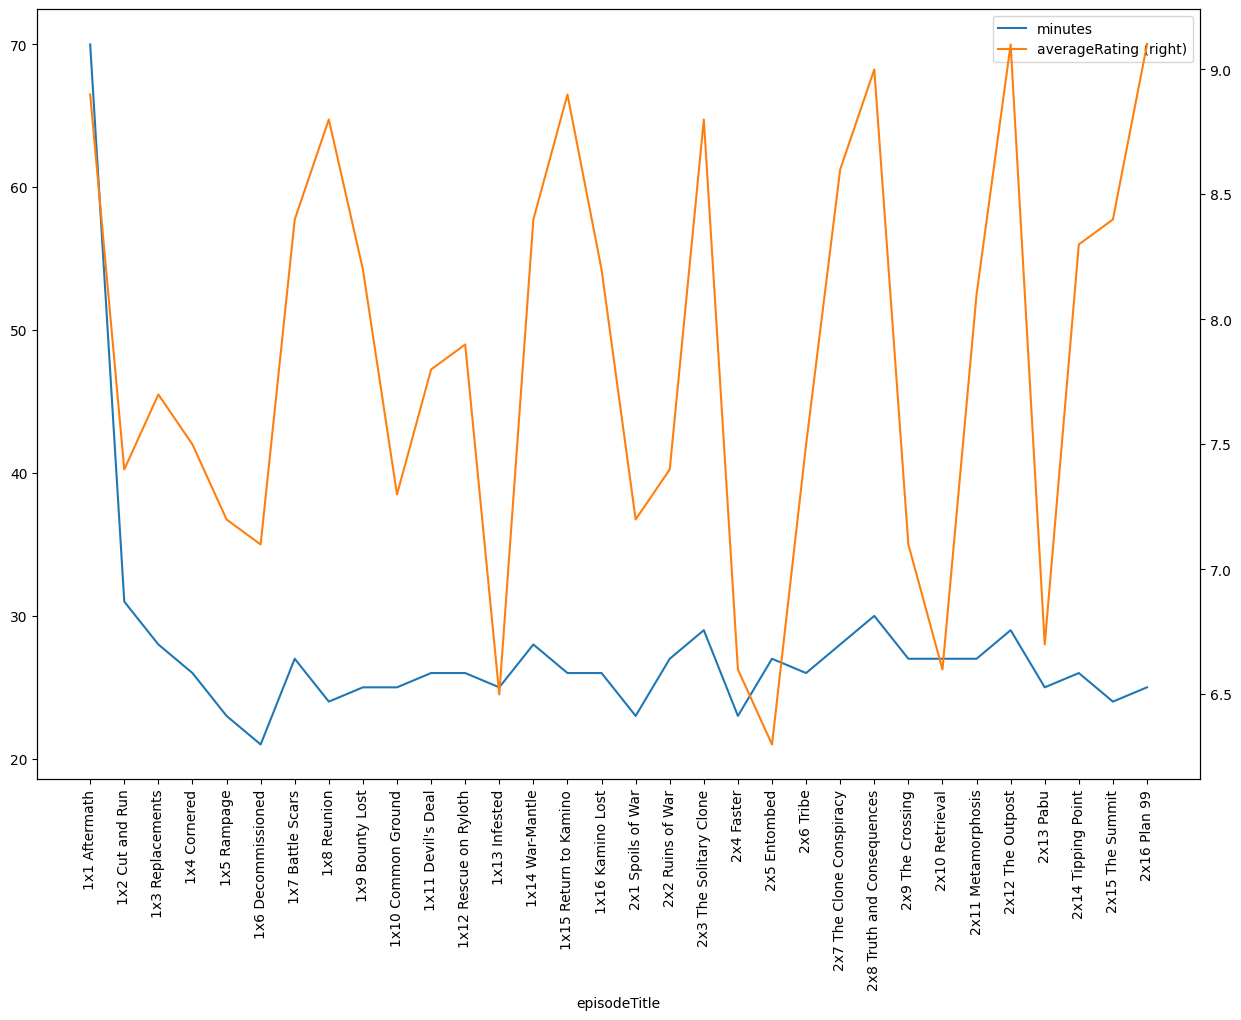

In [30]:
TVShowRuntime(shows['BadBatch'])

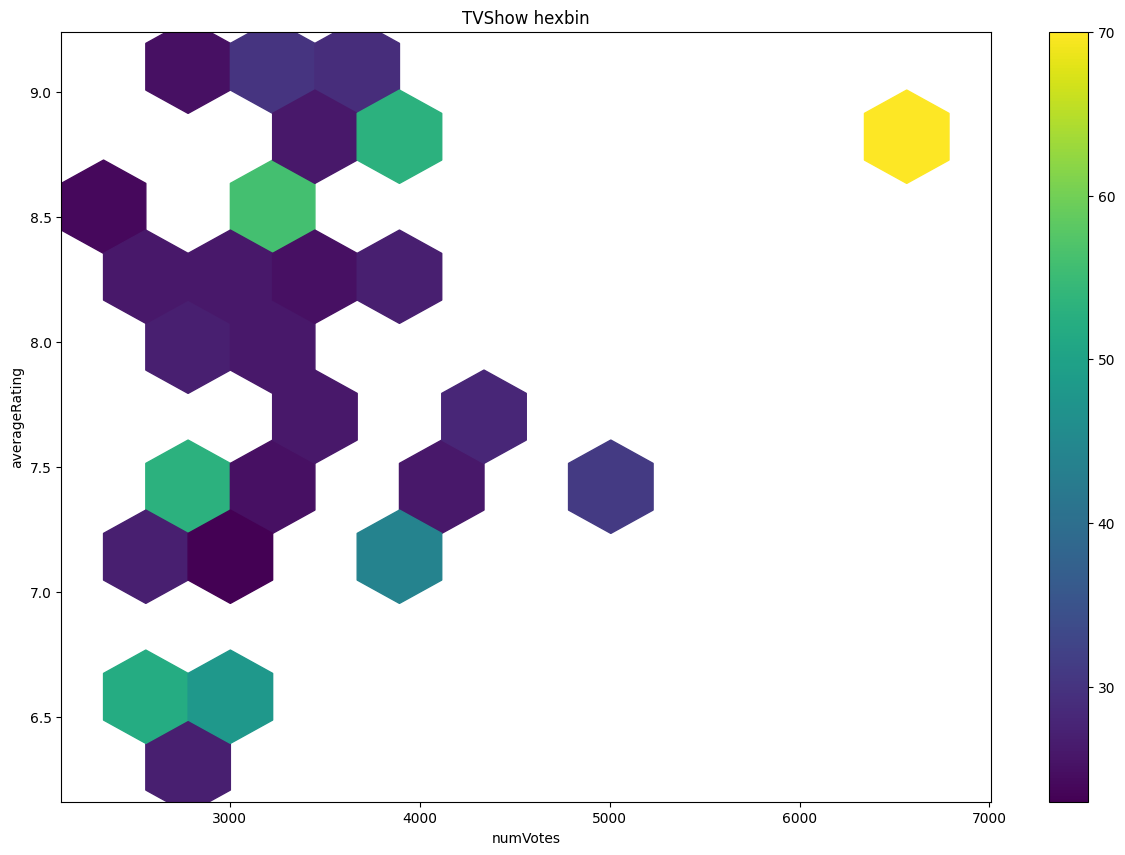

In [31]:
TVShowHexBin(shows['BadBatch'])

<Axes: xlabel='episodeTitle'>

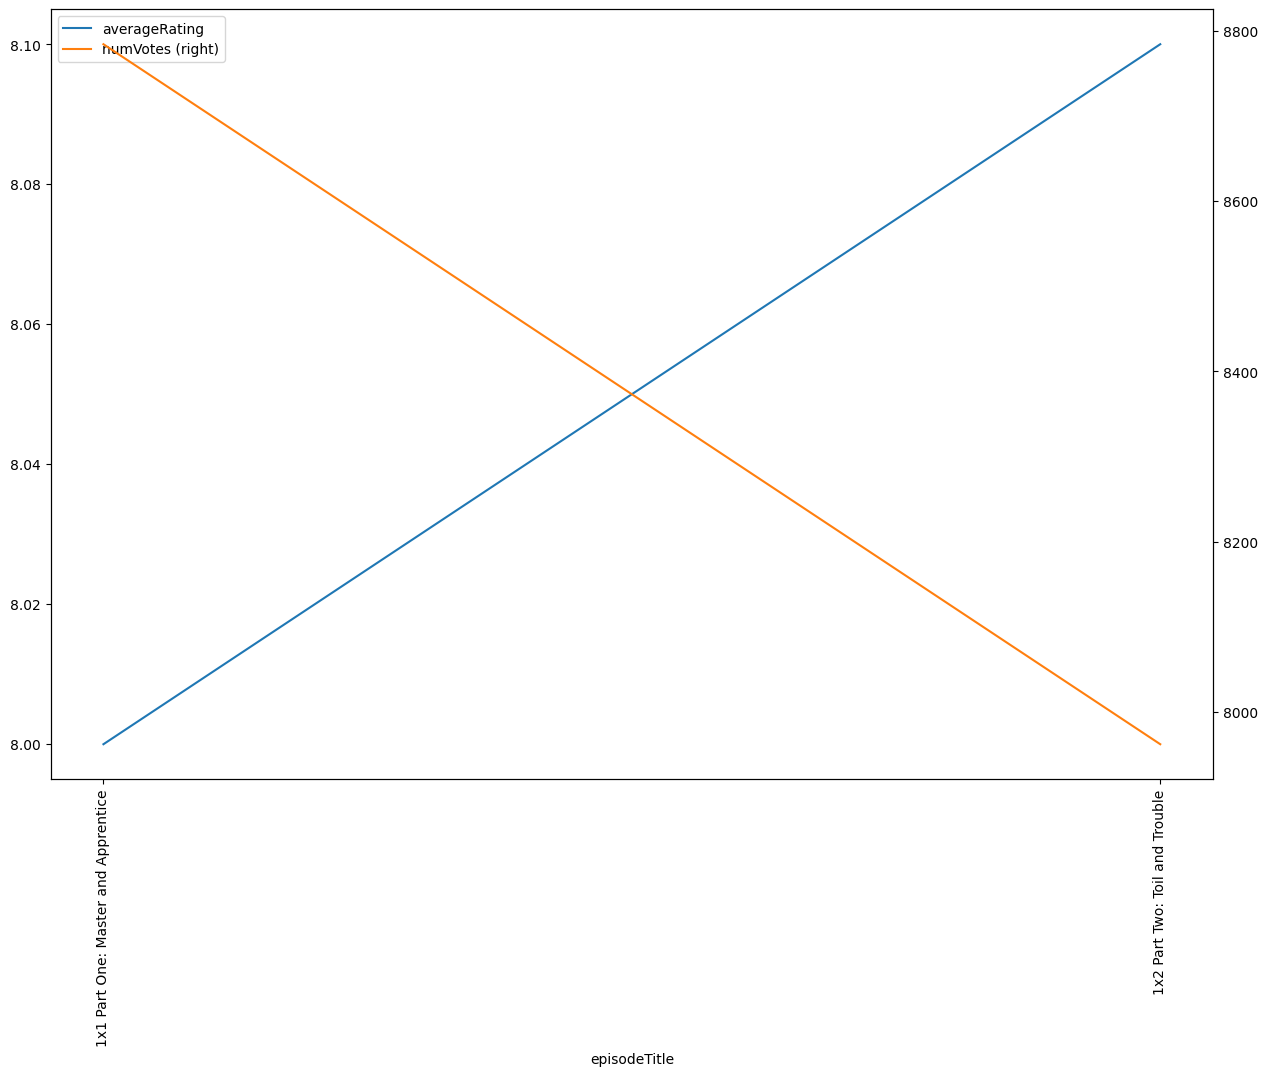

In [32]:
TVShowAvgRating(shows['Ahsoka'])

<Axes: xlabel='episodeTitle'>

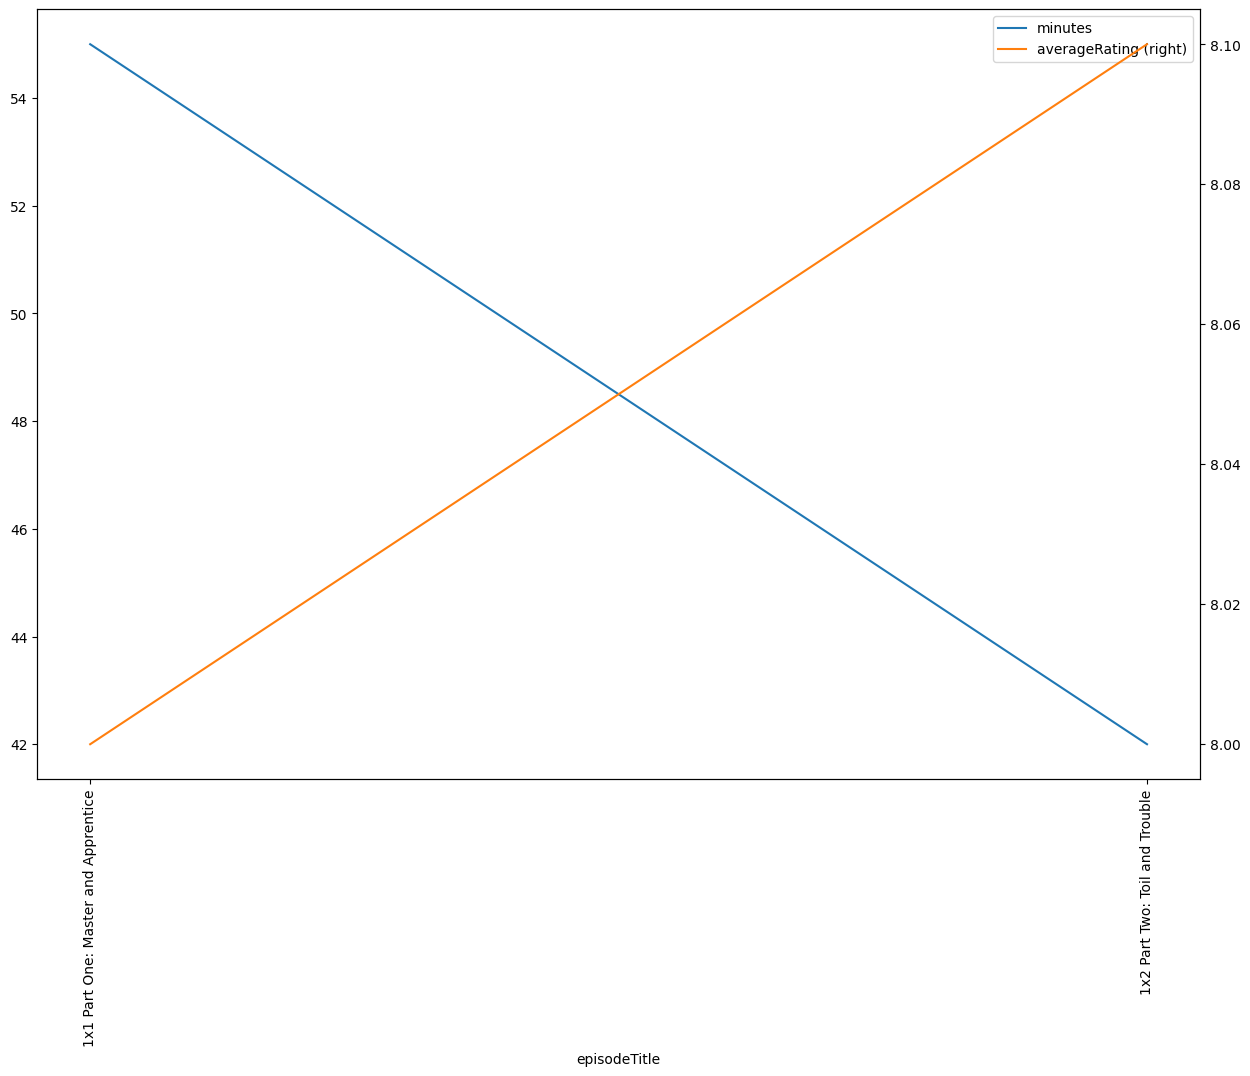

In [33]:
TVShowRuntime(shows['Ahsoka'])

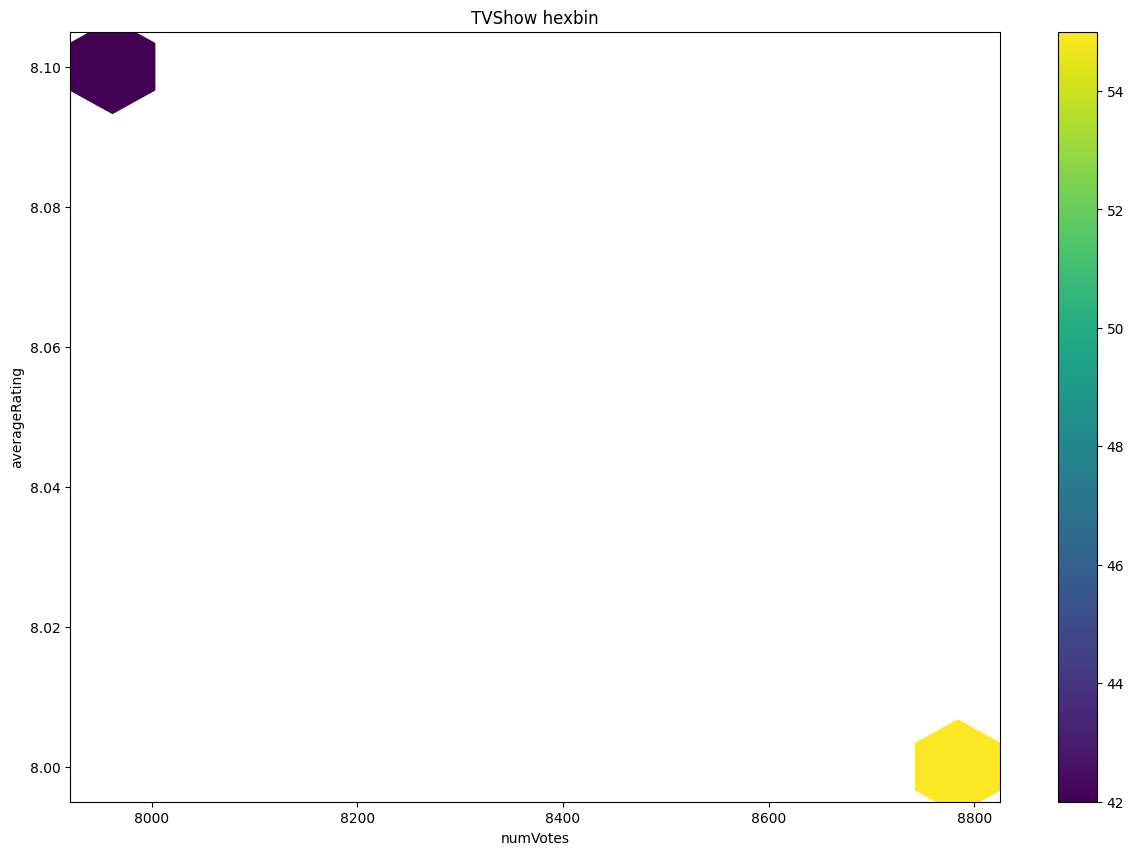

In [34]:
TVShowHexBin(shows['Ahsoka'])

<Axes: xlabel='episodeTitle'>

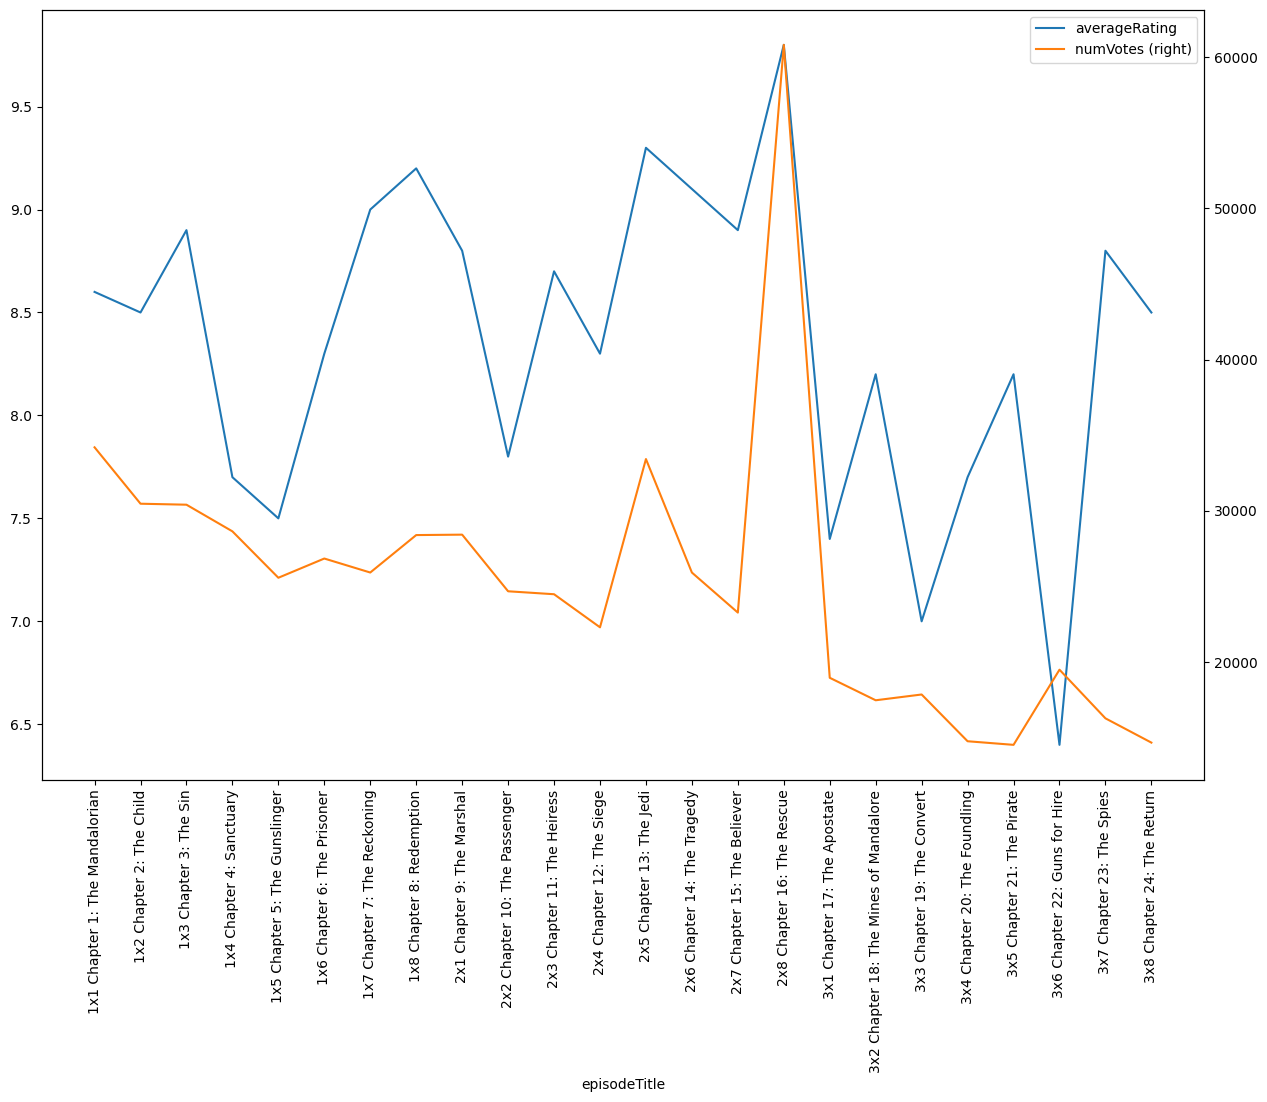

In [35]:
TVShowAvgRating(shows['Mando'])


<Axes: xlabel='episodeTitle'>

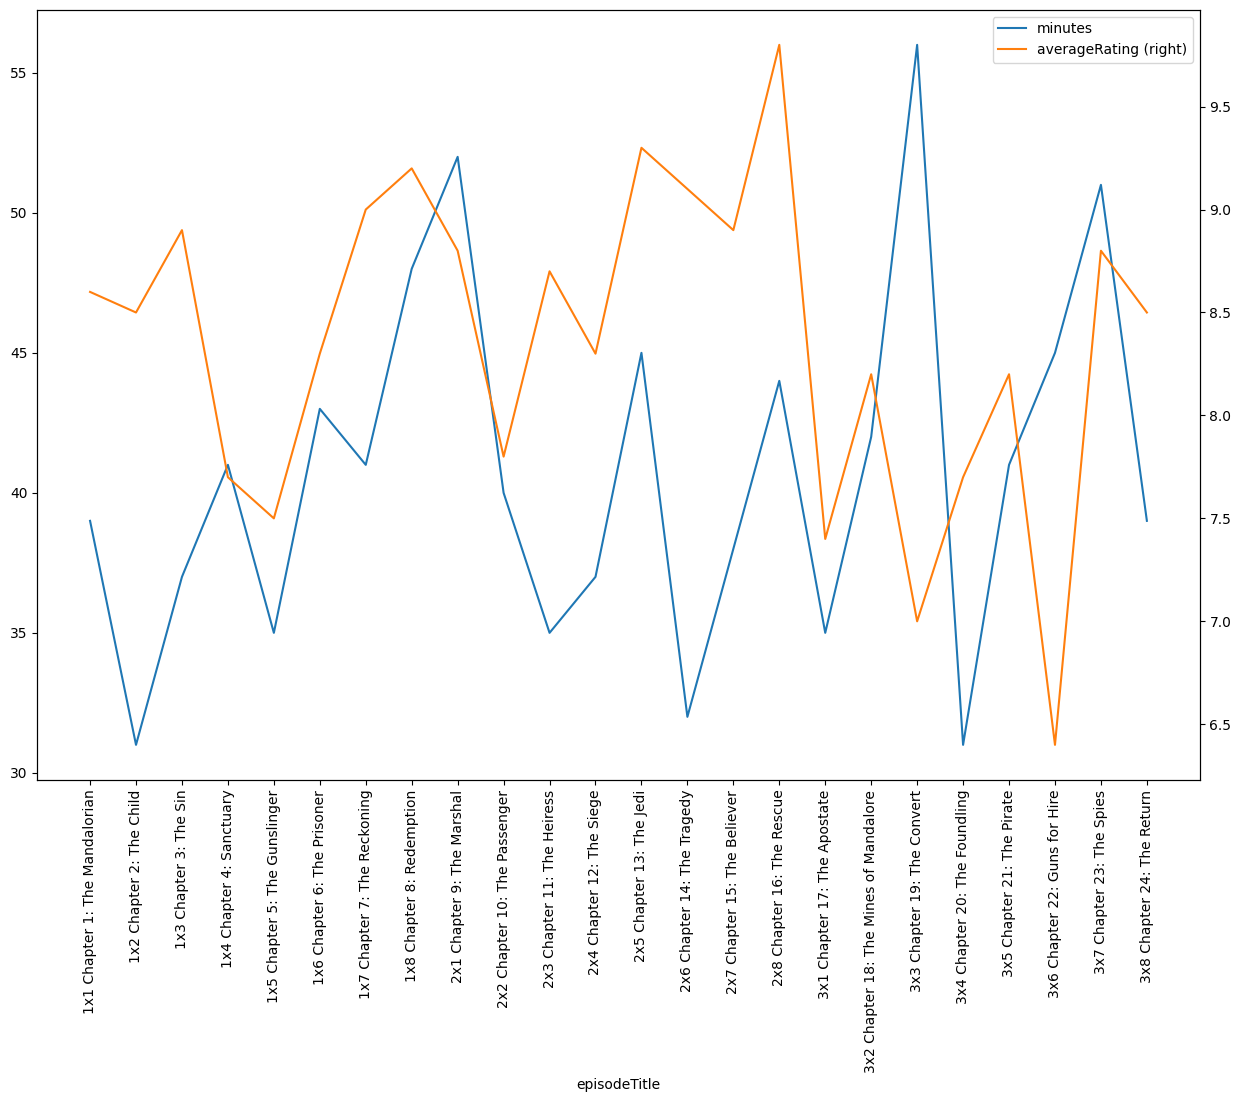

In [36]:
TVShowRuntime(shows['Mando'])

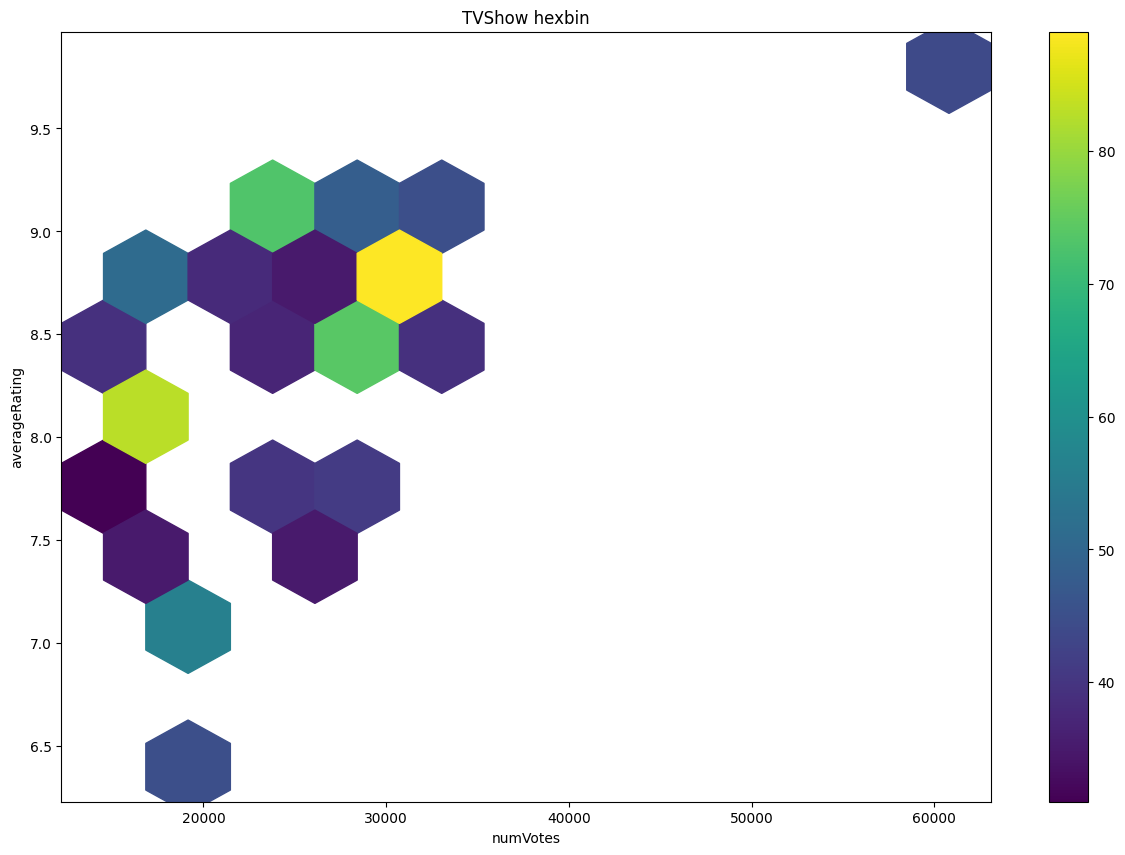

In [37]:
TVShowHexBin(shows['Mando'])

<Axes: xlabel='episodeTitle'>

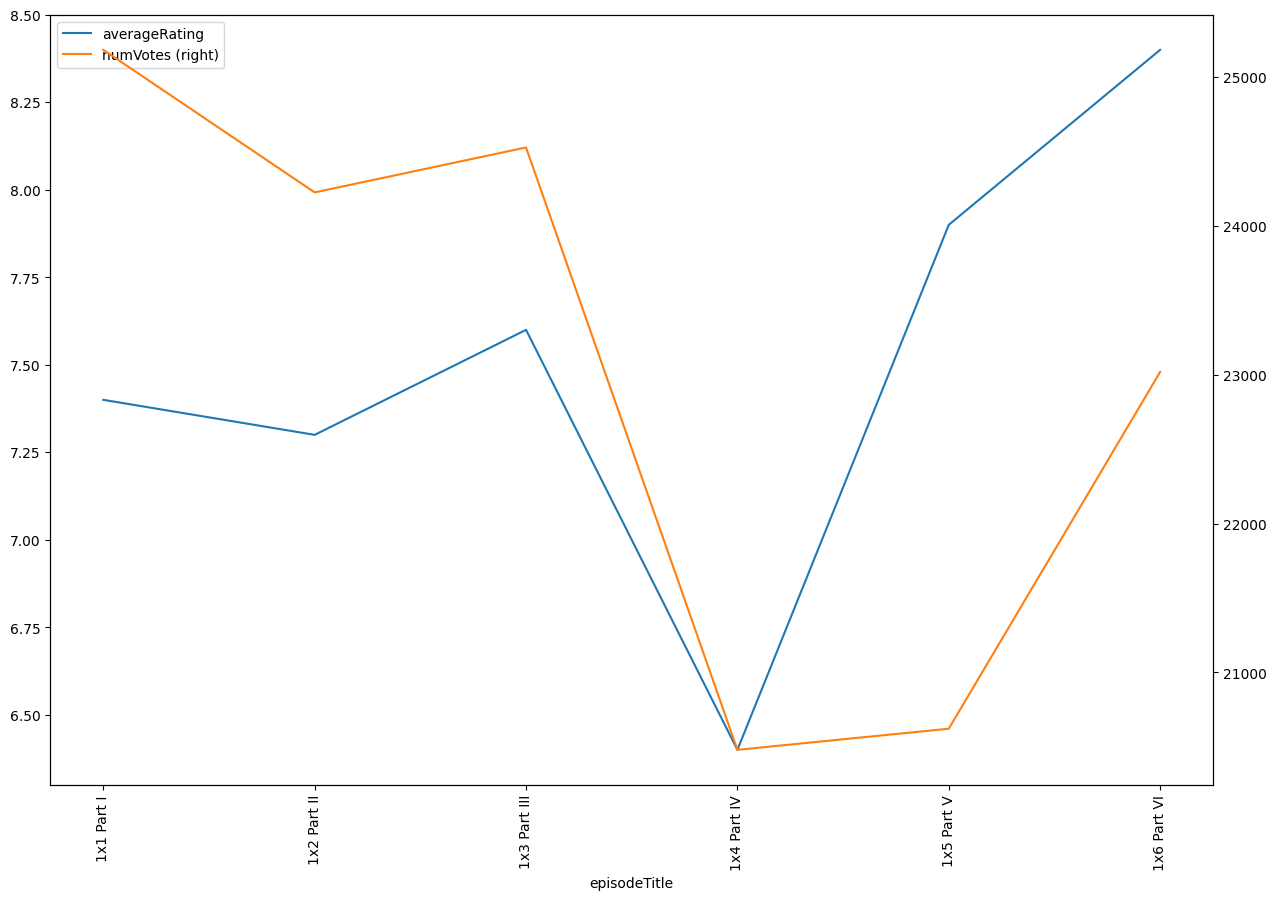

In [38]:
TVShowAvgRating(shows['Obiwan'])


<Axes: xlabel='episodeTitle'>

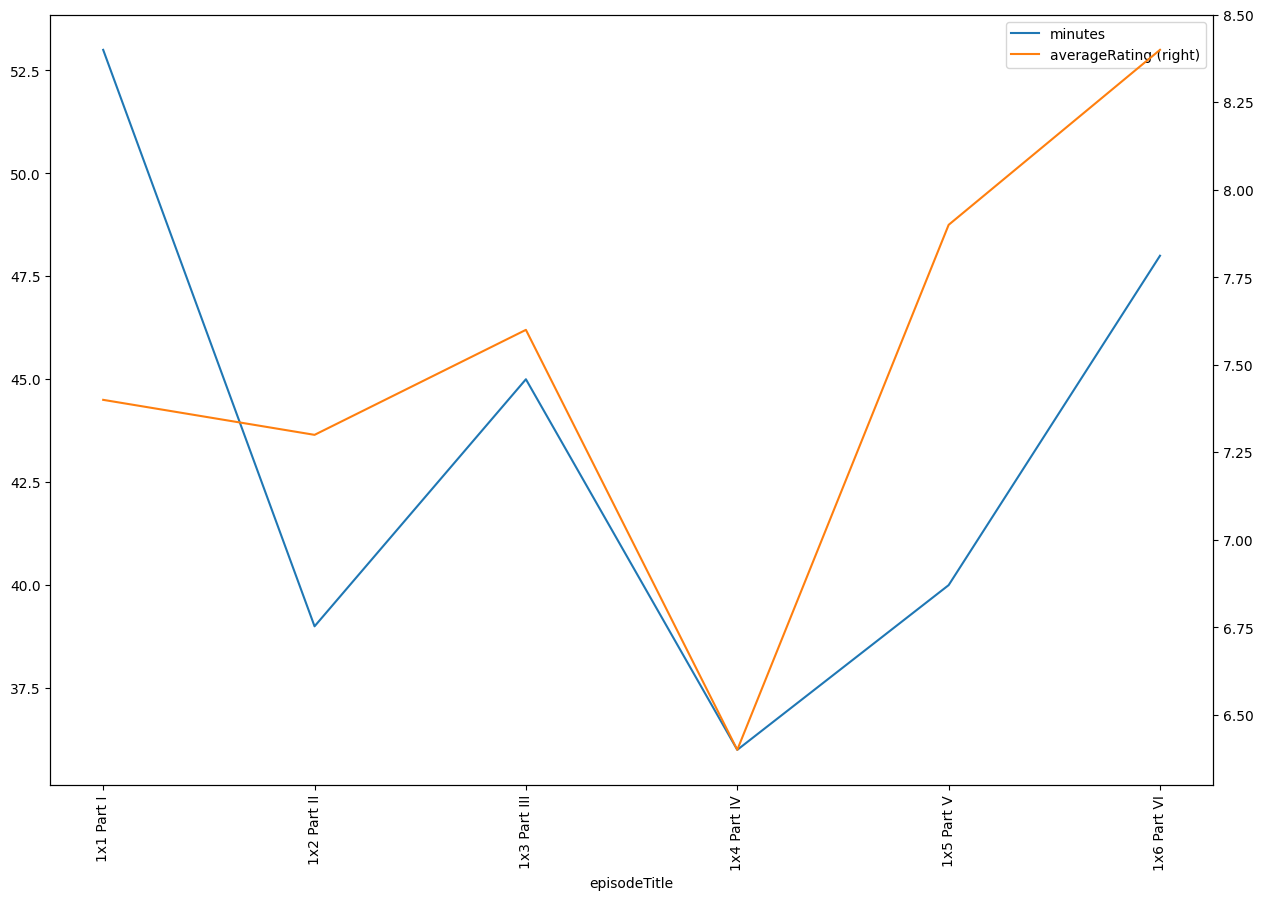

In [39]:
TVShowRuntime(shows['Obiwan'])

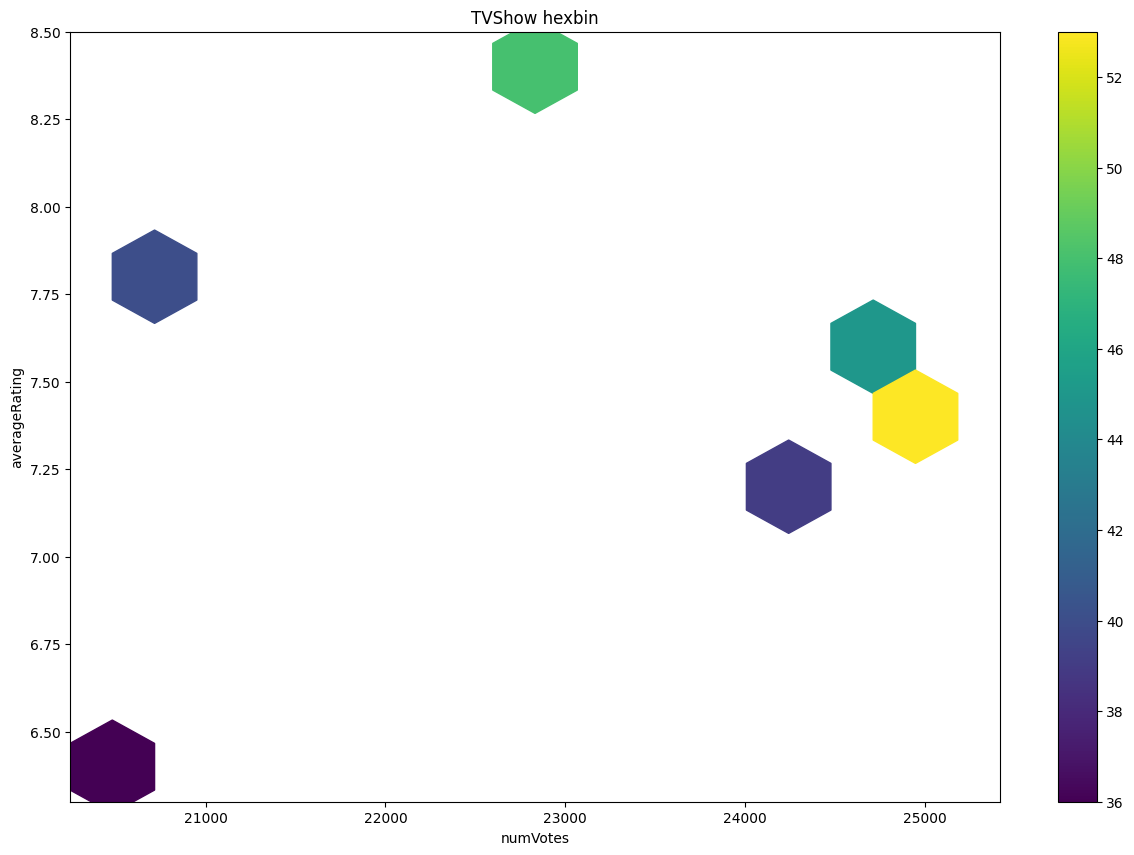

In [40]:
TVShowHexBin(shows['Obiwan'])